# Τεχνικές Εξόρυξης Δεδομένων - Εργασία 1
---
Ανάλυση Προσωπικότητας Πελατών.

Εισάγουμε τις κατάλληλες βιβλιοθήκες στον κώδικα.

In [139]:
# Pandas Library
import pandas as pd

# Numpy Library
import numpy as np

# Datetime Library
from datetime import datetime

# Seaborn Library
import seaborn as sns

# Matplotlib and Axes3D toolkit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# cdist from spicy library
from scipy.spatial.distance import cdist

""" Scikit Learn Tools """

# LabelEncoder and StandardScaler from preprocessing package
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# PCA from decomposition package
from sklearn.decomposition import PCA

# KMeans and AgglomerativeCLustering from cluster package
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# metrics package
from sklearn import metrics

Διαβάζουμε το marketing_campaign.csv αρχείο και επιτρέπουμε να φαίνονται όλες οι στήλες ώστε να μπορούμε να τις χρησιμοποιήσουμε για να λύσουμε τα ζητούμενα.

In [140]:
# Reading the csv file
df = pd.read_csv("/marketing_campaign.csv", sep='\t')

# Allowing all columns to be displayed
pd.set_option('display.max_columns', None)

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


---
## Ζητούμενο 1 - Προεπεξεργασία/Καθάρισμα

Ελέγξτε αν υπάρχουν τιμές που λείπουν στα δεδομένα και
χειριστείτε τις ανάλογα, μετατρέψτε στήλες που αφορούν ημερομηνίες σε DateTime
objects και ελέγξτε αν υπάρχουν και κάποια χαρακτηριστικά dtype: object τα οποία
μπορείτε να κωδικοποιήσετε/μετατρέψετε σε αριθμητικές τιμές.

Αρχικά μπορούμε να ταξινομήσουμε το dataframe με βάση όποια στήλη θέλουμε να ελέγξουμε αν λείπει τίποτα από την ταξινομημένη στήλη. Οι πλειάδες με κενή την ταξινομημένη στήλη, ταξινομούνται αυτόματα στο τέλος του dataframe.

In [141]:
# Sorting the dataframe by Income
Sorted = df.sort_values(['Income'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,5079,1971,Graduation,Married,NaN,1,1,03-03-2013,82,71,1,16,0,0,9,4,2,1,3,8,0,0,0,0,0,0,3,11,0
2079,10339,1954,Master,Together,NaN,0,1,23-06-2013,83,161,0,22,0,0,24,2,4,1,4,6,0,0,0,0,0,0,3,11,0
2081,3117,1955,Graduation,Single,NaN,0,1,18-10-2013,95,264,0,21,12,6,147,3,6,1,5,7,0,0,0,0,0,0,3,11,0
2084,5250,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,126,490,164,126,126,1,5,5,11,1,0,0,1,0,0,0,3,11,1


Παρατηρούμε ότι στην στήλη Income δεν έχουν συμπληρωθεί δεδομένα σε κάποιες πλειάδες. Έτσι μπορούμε να αφαιρέσουμε από το dataframe τις πλειάδες που έχουν NaN. Αυτό σημαίνει ότι στις πλειάδες που το Income είναι NaN, δεν έχει δωθεί τιμή στο Income από το csv αρχείο.  

In [142]:
# Drop any rows containing NaN values
df = df.dropna()

# Checking the result of the dropna function
Sorted = df.sort_values(['Income'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,10311,1969,Graduation,Married,4428.0,0,1,05-10-2013,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0
1846,9931,1963,PhD,Married,4023.0,1,1,23-06-2014,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,3,11,0
1524,11110,1973,Graduation,Single,3502.0,1,0,13-04-2013,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0
21,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0


Εδώ παρουσιάζουμε τους τύπους δεδομένων κάθε στήλης.

In [143]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Παρατηρούμε ότι το μόνο πεδίο στο dataframe που συσχετίζεται με ημερομηνίες έιναι το Dt_Customer και τώρα πρέπει να το μετατρέψουμε από object σε DateTime

In [ ]:
# Converting Dt_Customer to datetime object with format d-m-y
df.loc[:, 'Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

Τώρα θα δούμε πως είναι τώρα ο τύπος του Dt_Customer μαζί με τους υπόλοιπους. Παρατηρούμε ότι υπάρχουν μόνο άλλες δύο στήλες τύπου object (Education και Marital_Status). Αυτά τα πεδία δεν μπορούν να μετατραπούν ακόμα σε αριθμητικές τιμές, διότι θα είναι δυσνόητα και δεν είναι αυτονόητο με ποιον τρόπο θα αριθμηθούν οι πιθανές τιμές για τα πεδία. Επιπλεόν, χρειάζεται για το επόμενο ζητούμενο τα 2 αυτά πεδία, να παραμείνουν τύπου object.

In [145]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

---
## Ζητούμενο 2 - Μοναδικές τιμές

Εκτυπώστε τις μοναδικές τιμές στα κατηγορικά χαρακτηριστικά Marital_Status και
Education για να αποκτήσετε μια πιο σαφή εικόνα των δεδομένων. Αλλάξτε τις τιμές
[Alone,Absurd,YOLO] των Marital_Status με την τιμή ‘Single’. Χρησιμοποιήστε όποιο
τύπο γραφήματος θέλετε για να παρουσιάσετε το πλήθος των τιμών σε κάθε κατηγορία.

In [146]:
# Printing all unique values from the Education column in a list
print(df['Education'].unique())

# Printing all unique values from the Marital Status column in a list
print(df['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


Παρατηρούμε ότι οι τιμές Alone, Absurd και YOLO είναι πλεονασμός μιας που και τα 3 είναι συνώνυμα του Single για αυτό θα τα αντικαταστήσουμε στην βάση. Πριν το κάνουμε ας θυμηθούμε πως εμφανίζονται στο dataframe.  

In [147]:
Sorted = df.sort_values(['Marital_Status'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1
2163,7313,1949,2n Cycle,Widow,74859.0,0,0,2013-06-03,63,570,73,614,133,102,73,1,6,5,11,3,0,0,0,1,0,0,3,11,0
437,10664,1949,Master,Widow,51529.0,0,1,2013-09-07,14,400,4,35,6,0,22,2,9,1,5,8,0,0,0,0,0,0,3,11,0
2030,3945,1947,PhD,Widow,68117.0,0,1,2013-03-10,80,618,44,215,0,17,36,2,11,8,4,6,1,0,0,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,3,11,0
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,1
153,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1


Αντικαθιστούμε τα Alone, Absurd και YOLO με Single, και ελέγχουμε τα αποτελέσματα. Για την εκτύπωση, διαλέξαμε άτομα με Marital_Status ίσο με Single και χρόνο γέννησης το 1973, επειδή το παραπάνω dataframe έχει πολλές εισόδους με άτομα που γεννήθηκαν το 1973 και δήλωσαν ότι είναι Alone, Absurd ή YOLO.

In [148]:
# Replace all aforementioned values with 'Single'
to_be_replaced = ['Absurd', 'Alone', 'YOLO']
df = df.replace(to_be_replaced, 'Single')

# Select rows where column 'Marital_Status' is equal to 'Single' and column 'Year_Birth' is equal to 1973
result = df[(df['Marital_Status'] == 'Single') & (df['Year_Birth'] == 1973)]

# Print the result
result

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
138,7660,1973,PhD,Single,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,1
199,3182,1973,PhD,Single,46854.0,1,1,2014-03-31,81,96,1,79,7,1,79,6,5,1,3,8,1,0,0,0,0,0,3,11,1
238,7297,1973,Graduation,Single,7500.0,1,0,2013-12-26,54,5,3,10,12,7,20,4,3,1,3,7,0,0,0,0,0,0,3,11,0
634,8923,1973,Graduation,Single,83917.0,0,0,2013-04-18,12,514,22,732,42,198,79,1,6,7,7,3,0,0,0,0,0,0,3,11,1
1112,10022,1973,PhD,Single,54466.0,1,1,2014-02-09,78,12,0,4,0,0,0,1,1,0,2,5,0,0,0,0,0,0,3,11,0
1433,274,1973,Graduation,Single,34853.0,1,1,2013-12-23,75,9,3,15,2,3,2,2,2,0,3,6,0,0,0,0,0,0,3,11,0
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0
1595,1041,1973,PhD,Single,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1
2144,5136,1973,Graduation,Single,65333.0,0,1,2014-01-17,58,654,7,92,0,15,30,7,9,4,8,6,0,1,1,0,0,0,3,11,0
2177,492,1973,PhD,Single,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0


Τώρα θα φτιάξουμε γραφήμα για να παρουσιάσουμε το πλήθος τιμών στην κατηγορία Marital Status

          Marital_Status
Married              857
Together             573
Single               478
Divorced             232
Widow                 76


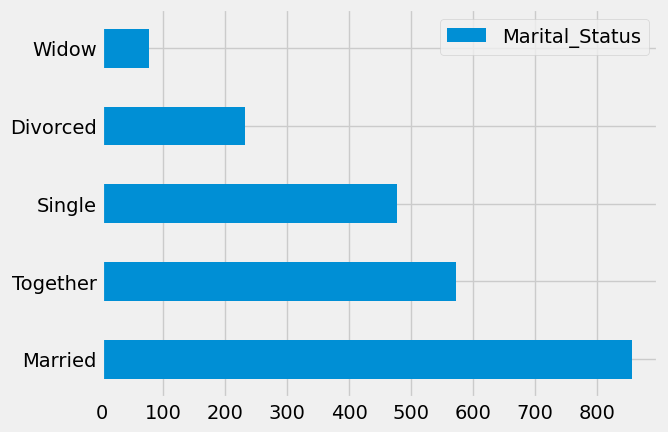

In [149]:
# Using value_counts() to find how many times each value has appeared in the 'Age' column
res = df['Marital_Status'].value_counts()

# Creating a new data frame for the result using to_frame() function
res = res.to_frame()

print(res)

# Creating a horizontal bar graph for the result data frame
MS_graph = res.plot.barh()

Τώρα θα φτιάξουμε γράφημα για να παρουσιάσουμε το πλήθος τιμών στην κατηγορία Education

            Education
Graduation       1116
PhD               481
Master            365
2n Cycle          200
Basic              54


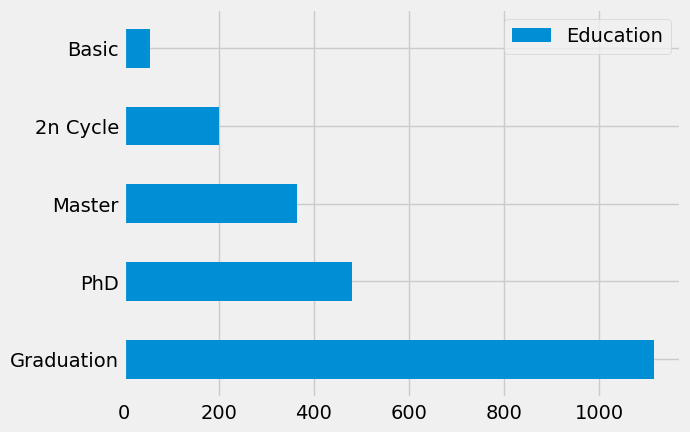

In [150]:
# Using value_counts() to find how many times each value has appeared in the 'Education' column
res = df['Education'].value_counts()

# Creating a new data frame for the result using to_frame() function
res = res.to_frame()

print(res)

# Creating a horizontal bar graph for the result data frame
MS_graph = res.plot.barh()

---
## Ζητούμενο 3 - Δημιουργία νέων χαρακτηριστικών

Α. Δημιουργία ενός χαρακτηριστικού ("Customer_For") που αντιπροσωπεύει τον αριθμό
των ημερών που οι πελάτες άρχισαν να ψωνίζουν στο κατάστημα σε σχέση με την
τελευταία καταγεγραμμένη ημερομηνία (Recency)

In [151]:
# Get the current date and time
now = datetime.now()

# Calculate the last day as a customer for each row
lasy_day_as_a_customer = now - pd.to_timedelta(df['Recency'], unit='D')

# Calculating the duration each row has been a customer   
duration = lasy_day_as_a_customer - df['Dt_Customer']

# Adding to the dataframe the days each row has been a customer  
df['Customer_For'] = duration.dt.days

# printing the dataframe with the results, the new column is the rightmost column of the dataframe
Sorted = df.sort_values(['Customer_For'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
2192,7990,1947,Graduation,Married,27469.0,0,0,2012-08-02,2,9,1,2,3,2,0,1,0,0,3,6,0,0,0,0,0,0,3,11,0,3900
654,3277,1955,Graduation,Divorced,49431.0,0,1,2012-08-03,9,219,3,100,26,0,17,2,7,1,5,8,0,0,0,0,0,0,3,11,0,3892
51,4114,1964,Master,Married,79143.0,0,0,2012-08-11,2,650,37,780,27,167,32,1,6,9,13,3,0,0,0,0,0,0,3,11,0,3891
1953,7919,1976,PhD,Together,72335.0,0,0,2012-08-13,2,1285,105,653,28,21,0,1,10,4,8,8,0,0,0,0,0,0,3,11,1,3889
2139,2715,1966,Master,Divorced,29435.0,1,1,2012-08-06,11,70,3,37,4,2,64,4,3,2,2,9,0,0,0,0,0,0,3,11,1,3887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,2939,1970,Master,Together,79419.0,0,0,2014-06-22,96,751,127,687,20,15,31,1,4,6,4,2,0,0,0,0,0,0,3,11,0,3117
178,10492,1959,Graduation,Together,38285.0,2,1,2014-06-24,96,2,0,5,2,0,1,1,0,0,3,2,0,0,0,0,0,0,3,11,0,3115
2054,6382,1953,Graduation,Together,48794.0,1,1,2014-06-26,97,25,0,11,3,0,15,1,1,0,3,4,0,0,0,0,0,0,3,11,0,3112
796,6722,1954,PhD,Married,70421.0,0,1,2014-06-28,98,479,28,136,75,14,35,3,10,3,7,6,0,0,0,0,0,0,3,11,0,3109


Β. Εξαγωγή της ηλικίας "Age" ενός πελάτη με βάση το "Year_Birth" που υποδεικνύει το
έτος γέννησης του αντίστοιχου ατόμου.

In [152]:
# Get the current year
current_year = datetime.now().year

df['Age'] = current_year - df['Year_Birth']

# printing the dataframe with the results, the new column is the rightmost column of the dataframe
Sorted = df.sort_values(['Age'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,3226,130
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,3446,124
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,3383,123
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,3,11,0,3466,83
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,3,11,0,3571,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,10548,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,17,372,138,106,44,1,3,8,12,1,0,0,0,0,0,0,3,11,0,3288,28
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,51,631,72,55,32,1,4,6,8,2,0,0,0,0,0,0,3,11,0,3789,28
1850,4427,1995,2n Cycle,Single,83257.0,0,0,2012-09-18,56,536,27,590,38,107,67,1,5,10,12,6,1,0,1,0,0,1,3,11,1,3799,28
1170,193,1996,Basic,Married,14421.0,0,0,2014-02-17,81,0,0,2,3,3,8,1,1,0,2,5,1,0,0,0,0,0,3,11,0,3257,27


Γ. Δημιουργήστε ένα άλλο χαρακτηριστικό "Spent" που υποδεικνύει το συνολικό ποσό
που ξόδεψε ο πελάτης σε όλες τις κατηγορίες σε διάστημα δύο ετών.

In [153]:
# Creating the total spent amount column for each customer
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# printing the dataframe with the results, the new column is the rightmost column of the dataframe
Sorted = df.sort_values(['Spent'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent
1572,5350,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,0,3,11,1,3313,32,2525
1179,5735,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,0,3,11,0,3313,32,2525
1492,1763,1988,Graduation,Together,87679.0,0,0,2013-07-27,62,1259,172,815,97,148,33,1,7,11,10,4,1,0,1,1,0,0,3,11,1,3481,35,2524
987,4580,1969,Graduation,Married,75759.0,0,0,2013-10-25,46,1394,22,708,89,91,182,1,9,7,9,5,1,0,1,1,0,0,3,11,1,3407,54,2486
1052,4475,1949,PhD,Married,69098.0,0,0,2013-02-16,82,1315,22,780,145,0,178,1,7,8,9,5,0,0,0,0,0,0,3,11,0,3622,74,2440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,10104,1974,Graduation,Together,33590.0,2,1,2013-11-03,65,4,0,2,0,0,2,1,1,0,2,7,0,0,0,0,0,0,3,11,0,3379,49,8
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0,3183,52,8
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,3267,48,6
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,3193,58,6


Δ. Δημιουργήστε ένα χαρακτηριστικό "Παιδιά" για να δηλώσετε το σύνολο των παιδιών σε
ένα νοικοκυριό, δηλαδή τα παιδιά και τους εφήβους.

In [154]:
# Creating the children column for each customer
df['Children'] = df['Kidhome'] + df['Teenhome']

# printing the dataframe with the results, the new column is the rightmost column of the dataframe
Sorted = df.sort_values(['Children'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children
1376,1542,1975,Graduation,Single,56243.0,1,2,2013-12-30,26,347,0,35,4,3,7,6,4,2,8,5,0,0,0,0,0,0,3,11,0,3361,48,396,3
404,2552,1955,PhD,Single,55521.0,1,2,2013-10-22,11,416,0,26,0,0,4,9,6,3,6,7,0,1,0,0,0,0,3,11,1,3445,68,446,3
826,9499,1954,Graduation,Married,93404.0,1,2,2013-05-07,97,1279,15,287,20,0,15,3,3,4,7,5,0,1,1,0,0,0,3,11,0,3527,69,1616,3
742,5237,1950,PhD,Single,48767.0,1,2,2014-01-01,79,28,1,21,3,0,10,3,2,1,3,5,0,0,0,0,0,0,3,11,0,3306,73,63,3
886,7023,1953,PhD,Single,46231.0,2,1,2012-11-26,87,189,2,55,0,5,12,4,6,1,4,9,0,0,0,0,0,0,3,11,0,3699,70,263,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,9624,1958,PhD,Together,65488.0,0,0,2014-06-13,46,603,45,207,36,18,54,1,3,4,6,1,0,0,0,0,0,0,3,11,0,3176,65,963,0
1570,4261,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1,3765,77,1315,0
1572,5350,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,0,3,11,1,3313,32,2525,0
624,6583,1955,2n Cycle,Married,72635.0,0,0,2013-06-03,54,390,22,323,104,35,107,1,6,8,6,3,0,0,0,1,0,0,3,11,0,3543,68,981,0


Ε. Για να αποκτήσετε περαιτέρω σαφήνεια του νοικοκυριού, δημιουργήστε ένα
χαρακτηριστικό με ένδειξη "Family_Size" που δείχνει το συνολικό αριθμό των ατόμων σε
ένα νοικοκυριό.

In [155]:
# Checking if a partner exists for the customers and adding them to the family
df.loc[(df['Marital_Status'] == 'Married') | (df['Marital_Status'] == 'Together'), 'Family_Size'] = 2
df.loc[(df['Marital_Status'] == 'Divorced') | (df['Marital_Status'] == 'Single') | (df['Marital_Status'] == 'Widow'), 'Family_Size'] = 1

# Adding the children to the family size
df['Family_Size'] = df['Family_Size'] + df['Children']

# Converting the column from float to integer
df['Family_Size'] = df['Family_Size'].astype('int64')

# Printing the dataframe with the results, the new column is the rightmost column of the dataframe
Sorted = df.sort_values(['Family_Size'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size
1580,3790,1956,Graduation,Together,34633.0,2,1,2014-01-23,31,8,1,5,0,0,1,1,1,0,2,6,0,0,0,0,0,0,3,11,0,3332,67,15,3,5
328,10350,1950,PhD,Married,54432.0,2,1,2013-05-09,37,33,0,5,0,0,0,1,1,0,3,4,0,0,0,0,0,0,3,11,0,3585,73,38,3,5
1127,1010,1977,Graduation,Together,46931.0,2,1,2014-04-24,94,41,0,17,3,1,16,2,1,1,3,3,0,0,0,0,0,0,3,11,0,3178,46,78,3,5
971,1734,1968,PhD,Together,40706.0,2,1,2013-01-17,37,59,0,11,4,2,5,4,3,0,4,7,0,0,0,0,0,0,3,11,0,3697,55,81,3,5
728,11171,1965,Master,Married,56962.0,2,1,2013-10-11,60,292,3,77,10,3,26,7,6,3,5,7,0,0,0,0,0,0,3,11,0,3407,58,411,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,2894,1985,Graduation,Single,72903.0,0,0,2013-10-29,74,1067,138,750,0,19,39,1,7,5,8,4,0,1,1,1,0,0,3,11,1,3375,38,2013,0,1
747,10548,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,17,372,138,106,44,1,3,8,12,1,0,0,0,0,0,0,3,11,0,3288,28,960,0,1
1137,8015,1962,PhD,Divorced,85696.0,0,0,2013-05-03,88,714,76,395,116,0,12,1,4,6,9,1,0,0,0,0,0,0,3,11,1,3540,61,1313,0,1
1138,10617,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,3,11,0,3210,34,30,0,1


Στ. Δημιουργήστε ένα χαρακτηριστικό "Is_Parent" που δηλώνει αν ένας πελάτης είναι και
γονιός. Θα παίρνει τιμή 1 αν είναι γονίος και 0 αν δεν είναι.

In [156]:
# Assigning the default value 1 to the Is_Parent column
df['Is_Parent'] = 1

# Checking if customer has no children
df.loc[df['Children'] == 0, 'Is_Parent'] = 0

# Printing the dataframe with the results, the new column is the rightmost column of the dataframe
Sorted = df.sort_values(['Is_Parent'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
1121,4713,1979,PhD,Married,31605.0,1,0,2012-11-22,15,74,0,42,2,1,6,2,2,1,4,7,0,0,0,0,0,0,3,11,0,3775,44,125,1,3,1
1376,1542,1975,Graduation,Single,56243.0,1,2,2013-12-30,26,347,0,35,4,3,7,6,4,2,8,5,0,0,0,0,0,0,3,11,0,3361,48,396,3,4,1
1394,2587,1972,PhD,Married,29791.0,1,0,2014-05-15,21,14,0,6,0,0,0,2,2,0,3,5,0,0,0,0,0,0,3,11,0,3230,51,20,1,3,1
1393,5289,1975,2n Cycle,Single,41658.0,1,1,2012-11-09,30,8,4,12,15,4,29,2,1,1,2,4,0,0,0,0,0,0,3,11,0,3773,48,72,2,3,1
1392,10146,1972,PhD,Together,38887.0,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,3,11,0,3308,51,42,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,6406,1988,Master,Married,78285.0,0,0,2013-10-28,13,647,107,391,175,67,40,1,6,4,10,3,0,0,0,0,0,0,3,11,0,3437,35,1427,0,2,0
1207,3068,1990,Graduation,Married,18351.0,0,0,2013-10-29,1,1,12,9,0,14,7,1,2,0,3,7,0,0,0,0,0,0,3,11,0,3448,33,43,0,2,0
1206,7789,1965,PhD,Married,84618.0,0,0,2013-11-22,96,684,100,801,21,66,0,1,6,9,10,2,0,0,1,0,0,0,3,11,0,3329,58,1672,0,2,0
1721,1172,1983,PhD,Married,92491.0,0,0,2013-05-01,71,979,44,935,29,25,22,1,7,5,12,3,0,1,1,1,0,0,3,11,1,3559,40,2034,0,2,0


Ζ. Δημιουργήστε ένα άλλο χαρακτηριστικό "Living_With" χρησιμοποιώντας το
"Marital_Status" για να εξάγετε την κατάσταση διαβίωσης των ζευγαριών. Συγκεκριμένα
το χαρακτηριστικό αυτό πρέπει να έχει δύο τιμές, "Partner" και "Alone".

In [157]:
# Checking if a partner exists for the customers and adjusting the Living_With column accordingly
df.loc[(df['Marital_Status'] == 'Married') | (df['Marital_Status'] == 'Together'), 'Living_With'] = 'Partner'
df.loc[(df['Marital_Status'] == 'Divorced') | (df['Marital_Status'] == 'Single') | (df['Marital_Status'] == 'Widow'), 'Living_With'] = 'Alone'

# Printing the dataframe with the results, the new column is the rightmost column of the dataframe
Sorted = df.sort_values(['Living_With'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With
1121,4713,1979,PhD,Married,31605.0,1,0,2012-11-22,15,74,0,42,2,1,6,2,2,1,4,7,0,0,0,0,0,0,3,11,0,3775,44,125,1,3,1,Partner
1329,158,1945,PhD,Together,71604.0,0,0,2013-11-17,3,345,53,528,98,75,97,1,8,3,5,4,1,0,0,0,0,0,3,11,1,3427,78,1196,0,2,0,Partner
1343,2253,1990,Graduation,Married,18929.0,0,0,2013-02-16,15,32,0,8,23,4,18,1,1,0,4,6,0,0,0,0,0,0,3,11,0,3689,33,85,0,2,0,Partner
1342,873,1949,Master,Married,62845.0,1,1,2012-10-01,3,1099,0,45,0,0,34,11,3,4,10,8,0,1,0,0,0,0,3,11,1,3839,74,1178,2,4,1,Partner
1341,5510,1977,Master,Married,43263.0,0,1,2012-11-21,2,262,6,61,0,10,102,3,5,2,6,5,0,0,0,0,0,0,3,11,0,3789,46,441,1,3,1,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,10133,1970,Graduation,Single,93790.0,0,0,2014-02-12,16,1302,68,731,89,114,45,0,6,7,12,2,0,1,1,1,0,0,3,11,1,3327,53,2349,0,1,0,Alone
515,203,1975,Master,Single,81169.0,0,0,2013-04-14,47,1288,20,613,80,61,27,1,5,7,9,2,0,0,0,0,0,0,3,11,0,3600,48,2089,0,1,0,Alone
1460,8233,1950,Master,Widow,64866.0,0,1,2014-01-26,9,508,5,21,7,5,10,4,7,3,7,5,0,1,0,0,0,0,3,11,0,3351,73,556,1,2,1,Alone
511,4320,1979,Graduation,Single,60152.0,0,1,2013-03-28,6,325,83,300,86,58,91,1,6,4,12,3,0,0,0,0,0,0,3,11,0,3658,44,943,1,2,1,Alone


Η. Δημιουργήστε τη στήλη “Age Group” χρησιμοποιώντας τη στήλη “Age”, η οποία να
ομαδοποιεί τις ηλικίες στις παρακάτω τιμές "21-30", "31-40", "41-50", "51-60", "61-70",
"71-80", ">80".

In [158]:
# Grouping the Ages in the Age column using the Age Group column accordingly
df.loc[(df['Age'] >= 21) & (df['Age'] <= 30), 'Age_Group'] = '21-30'
df.loc[(df['Age'] >= 31) & (df['Age'] <= 40), 'Age_Group'] = '31-40'
df.loc[(df['Age'] >= 41) & (df['Age'] <= 50), 'Age_Group'] = '41-50'
df.loc[(df['Age'] >= 51) & (df['Age'] <= 60), 'Age_Group'] = '51-60'
df.loc[(df['Age'] >= 61) & (df['Age'] <= 70), 'Age_Group'] = '61-70'
df.loc[(df['Age'] >= 71) & (df['Age'] <= 80), 'Age_Group'] = '71-80'
df.loc[(df['Age'] > 80), 'Age_Group'] = '>80'

# Printing the dataframe with the results, the new column is the rightmost column of the dataframe
Sorted = df.sort_values(['Age_Group'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,3446,124,1853,0,2,0,Partner,>80
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,3,11,0,3466,83,157,0,1,0,Alone,>80
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,3226,130,22,1,2,1,Alone,>80
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,3383,123,65,1,2,1,Alone,>80
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,3,11,0,3571,82,2119,0,2,0,Partner,>80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,10548,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,17,372,138,106,44,1,3,8,12,1,0,0,0,0,0,0,3,11,0,3288,28,960,0,1,0,Alone,21-30
1163,6905,1994,Graduation,Together,80685.0,0,0,2012-08-22,55,241,45,604,34,26,54,1,6,4,10,2,0,0,0,0,0,0,3,11,0,3827,29,1004,0,2,0,Partner,21-30
1170,193,1996,Basic,Married,14421.0,0,0,2014-02-17,81,0,0,2,3,3,8,1,1,0,2,5,1,0,0,0,0,0,3,11,0,3257,27,16,0,2,0,Partner,21-30
1850,4427,1995,2n Cycle,Single,83257.0,0,0,2012-09-18,56,536,27,590,38,107,67,1,5,10,12,6,1,0,1,0,0,1,3,11,1,3799,28,1365,0,1,0,Alone,21-30


---
## Ζητούμενο 4 - Ακραίες τιμές
Ελέγξτε αν υπάρχουν ακραίες τιμές στα χαρακτηριστικά και διαγράψτε τις από τα
δεδομένα.

Χρησιμοποιούμε τον αλγόριθμο που παρουσιάζεται στο PythonLab του μαθήματος. Θέλουμε το απόλυτο του Z-score κάθε στοιχείου μιας στήλης να είναι μικρότερο ή ίσο με 3 για να μην αποτελεί ακραία τιμή. Θεωρούμε ότι όλα τα πεδία ακολουθουν την κανονική κατανομή.

Σε αυτό το ζητούμενο αγνοήθηκαν τα χαρακτηριστικά τύπου object και date και τα χαρακτηριστικά που παίρνουν μόνο τιμές 0 και 1. Επίσης θα αγνοηθούν και τα χαρακτηριστικά από το προηγούμενο ζητούμενο, επειδή προκύπτουν μέσω σχέσεων από τα προηγούμενα χαρακτηριστικά.

Για λόγους οικονομίας, στην παρουσίαση αναγράφονται μόνο τα χαρακτηριστικά που έχουν Outliers. Όσα αριθμητικά χαρακτηριστικά δεν αναφέρονται στην παρουσίαση αυτό σημαίνει ότι δεν έχουν ακράιες τιμές.

Ξεκινάμε με το χαρακτηριστικό Year_Birth και παρατηρούμε ότι έχει 3 Outliers.

In [159]:
# Defining and finding the outliers with the relation |x - mean(x)| > 3*standard_deviation(x)
df['Outlier'] = abs(df['Year_Birth'] - df['Year_Birth'].mean()) > 3*df['Year_Birth'].std()

# Printing the dataframe with the results, the new column is the rightmost column of the dataframe
Sorted = df.sort_values(['Outlier'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,3226,130,22,1,2,1,Alone,>80,True
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,3446,124,1853,0,2,0,Partner,>80,True
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,3383,123,65,1,2,1,Alone,>80,True
1497,2072,1969,PhD,Together,53374.0,0,1,2012-08-16,34,896,10,101,13,10,34,6,4,2,9,9,1,0,0,0,0,0,3,11,1,3854,54,1064,1,3,1,Partner,51-60,False
1492,1763,1988,Graduation,Together,87679.0,0,0,2013-07-27,62,1259,172,815,97,148,33,1,7,11,10,4,1,0,1,1,0,0,3,11,1,3481,35,2524,0,2,0,Partner,31-40,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2281,1970,Graduation,Single,33697.0,1,0,2013-09-15,34,4,3,7,0,3,11,1,1,0,2,7,1,0,0,0,0,0,3,11,0,3459,53,28,1,2,1,Alone,51-60,False
747,10548,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,17,372,138,106,44,1,3,8,12,1,0,0,0,0,0,0,3,11,0,3288,28,960,0,1,0,Alone,21-30,False
746,7235,1975,2n Cycle,Married,17003.0,1,0,2013-12-09,37,2,5,12,4,8,7,3,2,0,4,5,0,0,0,0,0,0,3,11,0,3371,48,38,1,3,1,Partner,41-50,False
745,3560,1952,Graduation,Together,83844.0,0,0,2013-05-12,57,901,31,345,75,31,191,1,4,4,11,1,0,0,1,0,0,0,3,11,0,3562,71,1574,0,2,0,Partner,71-80,False


Ας τα διαγράψουμε.

In [160]:
# Keeping in the dataframe everything except the outliers
df = df[df['Outlier'] == False]

# Printing the dataframe with the results, the new column is the rightmost column of the dataframe
Sorted = df.sort_values(['Year_Birth'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
46,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,18,14,15,22,50,3,3,1,3,9,0,0,0,0,0,0,3,11,1,3779,27,122,0,2,0,Partner,21-30,False
1170,193,1996,Basic,Married,14421.0,0,0,2014-02-17,81,0,0,2,3,3,8,1,1,0,2,5,1,0,0,0,0,0,3,11,0,3257,27,16,0,2,0,Partner,21-30,False
1850,4427,1995,2n Cycle,Single,83257.0,0,0,2012-09-18,56,536,27,590,38,107,67,1,5,10,12,6,1,0,1,0,0,1,3,11,1,3799,28,1365,0,1,0,Alone,21-30,False
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,51,631,72,55,32,1,4,6,8,2,0,0,0,0,0,0,3,11,0,3789,28,1435,0,1,0,Alone,21-30,False
696,8315,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,2,11,2,0,4,1,1,0,2,6,0,0,0,0,0,0,3,11,0,3236,28,23,0,1,0,Alone,21-30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,3,11,1,3666,80,902,0,1,0,Alone,71-80,False
894,8800,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,3,11,1,3666,80,902,0,1,0,Alone,71-80,False
1923,4994,1943,Master,Single,77598.0,0,0,2013-10-01,53,1193,33,281,129,66,33,1,7,5,13,3,0,0,1,0,0,0,3,11,0,3424,80,1735,0,1,0,Alone,71-80,False
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,3,11,0,3571,82,2119,0,2,0,Partner,>80,False


Συνεχίζουμε με το επόμενο χαρακτηριστικό, το Income.

In [161]:
# Defining and finding the outliers with the relation |x - mean(x)| > 3*standard_deviation(x)
df['Outlier'] = abs(df['Income'] - df['Income'].mean()) > 3*df['Income'].std()

# Printing the dataframe with the results
Sorted = df.sort_values(['Outlier'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,3425,74,8,0,2,0,Partner,71-80,True
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0,3559,52,59,1,3,1,Partner,51-60,True
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0,3619,46,1730,0,2,0,Partner,41-50,True
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,3575,46,62,1,3,1,Partner,41-50,True
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,3879,41,1717,0,2,0,Partner,41-50,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,7938,1958,PhD,Together,51518.0,0,1,2013-10-03,92,350,8,66,17,4,4,2,3,2,10,3,0,0,0,0,0,0,3,11,0,3383,65,449,1,3,1,Partner,61-70,False
750,6974,1972,PhD,Together,83443.0,0,0,2013-12-31,89,518,42,742,55,56,84,1,6,10,5,2,0,0,0,0,0,0,3,11,0,3297,51,1497,0,2,0,Partner,51-60,False
749,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,0,3,11,1,3357,69,1215,0,2,0,Partner,61-70,False
748,2281,1970,Graduation,Single,33697.0,1,0,2013-09-15,34,4,3,7,0,3,11,1,1,0,2,7,1,0,0,0,0,0,3,11,0,3459,53,28,1,2,1,Alone,51-60,False


Παρατηρούμε ότι και εκεί υπάρχουν ακραίες τιμές. Ας διαγράψουμε τις ακραίες τιμές.

In [162]:
# Keeping in the dataframe everything except the outliers
df = df[df['Outlier'] == False]

# Printing the dataframe with the results
Sorted = df.sort_values(['Income'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
1898,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,3,11,0,3229,78,277,0,1,0,Alone,71-80,False
646,4611,1970,Graduation,Together,105471.0,0,0,2013-01-21,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,0,3,11,1,3694,53,1724,0,2,0,Partner,51-60,False
252,10089,1974,Graduation,Divorced,102692.0,0,0,2013-04-05,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1,3651,49,1112,0,1,0,Alone,41-50,False
203,2798,1977,PhD,Together,102160.0,0,0,2012-11-02,54,763,29,138,76,176,58,0,7,9,10,4,0,1,1,1,0,0,3,11,1,3756,46,1240,0,2,0,Partner,41-50,False
124,7215,1983,Graduation,Single,101970.0,0,0,2013-03-12,69,722,27,102,44,72,168,0,6,8,13,2,0,1,1,1,0,0,3,11,1,3611,40,1135,0,1,0,Alone,31-40,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0,3473,54,359,1,3,1,Partner,51-60,False
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,3,11,0,3183,60,9,2,4,1,Partner,51-60,False
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,3592,50,5,1,2,1,Alone,41-50,False
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,3703,44,1730,1,3,1,Partner,41-50,False


Συνεχίζουμε με το επόμενο χαρακτηριστικό, MntWines.

In [163]:
# Defining and finding the outliers with the relation |x - mean(x)| > 3*standard_deviation(x)
df['Outlier'] = abs(df['MntWines'] - df['MntWines'].mean()) > 3*df['MntWines'].std()

# Printing the dataframe with the results
Sorted = df.sort_values(['Outlier'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
1641,1665,1964,PhD,Divorced,64140.0,0,2,2013-09-23,71,1459,0,61,0,15,215,5,2,5,6,5,1,0,1,0,1,0,3,11,1,3414,59,1750,2,3,1,Alone,51-60,True
559,3174,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1,3548,64,1957,1,3,1,Partner,61-70,True
917,8362,1982,PhD,Married,84169.0,0,0,2013-08-07,9,1478,19,403,0,19,0,1,7,6,6,3,0,1,1,0,0,0,3,11,1,3523,41,1919,0,2,0,Partner,41-50,True
1749,737,1949,PhD,Married,80360.0,0,0,2013-03-03,56,1493,86,454,112,43,43,2,4,4,5,2,0,1,1,1,0,0,3,11,0,3633,74,2231,0,2,0,Partner,71-80,True
1488,9743,1955,Graduation,Married,76998.0,0,1,2013-01-11,85,1449,89,161,69,35,107,2,11,8,8,6,0,0,1,0,0,0,3,11,0,3655,68,1910,1,3,1,Partner,61-70,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,7938,1958,PhD,Together,51518.0,0,1,2013-10-03,92,350,8,66,17,4,4,2,3,2,10,3,0,0,0,0,0,0,3,11,0,3383,65,449,1,3,1,Partner,61-70,False
750,6974,1972,PhD,Together,83443.0,0,0,2013-12-31,89,518,42,742,55,56,84,1,6,10,5,2,0,0,0,0,0,0,3,11,0,3297,51,1497,0,2,0,Partner,51-60,False
749,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,0,3,11,1,3357,69,1215,0,2,0,Partner,61-70,False
748,2281,1970,Graduation,Single,33697.0,1,0,2013-09-15,34,4,3,7,0,3,11,1,1,0,2,7,1,0,0,0,0,0,3,11,0,3459,53,28,1,2,1,Alone,51-60,False


Παρατηρούμε ότι και εκεί υπάρχουν ακραίες τιμές. Ας διαγράψουμε τις ακραίες τιμές.

In [164]:
# Keeping in the dataframe everything except the outliers
df = df[df['Outlier'] == False]

# Printing the dataframe with the results
Sorted = df.sort_values(['MntWines'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
1052,4475,1949,PhD,Married,69098.0,0,0,2013-02-16,82,1315,22,780,145,0,178,1,7,8,9,5,0,0,0,0,0,0,3,11,0,3622,74,2440,0,2,0,Partner,71-80,False
2127,6292,1986,PhD,Married,82333.0,0,0,2013-03-30,60,1311,0,359,46,89,17,1,4,3,10,2,0,0,1,0,0,0,3,11,1,3602,37,1822,0,2,0,Partner,31-40,False
870,10140,1983,PhD,Together,70123.0,0,0,2013-09-28,27,1308,0,396,23,0,0,1,5,7,4,3,0,1,0,0,1,0,3,11,0,3453,40,1727,0,2,0,Partner,31-40,False
1458,10133,1970,Graduation,Single,93790.0,0,0,2014-02-12,16,1302,68,731,89,114,45,0,6,7,12,2,0,1,1,1,0,0,3,11,1,3327,53,2349,0,1,0,Alone,51-60,False
1191,8732,1969,Master,Widow,67369.0,0,1,2012-11-17,81,1298,0,70,37,14,42,4,7,4,10,4,0,1,1,0,0,0,3,11,1,3714,54,1461,1,2,1,Alone,51-60,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,9617,1951,Graduation,Single,15033.0,0,0,2014-04-16,37,0,4,5,6,0,4,1,1,0,3,3,0,0,0,0,0,0,3,11,0,3243,72,19,0,1,0,Alone,71-80,False
738,6516,1989,Basic,Married,17487.0,1,0,2013-03-18,37,0,0,1,7,4,6,1,1,0,2,7,0,0,0,0,0,0,3,11,0,3637,34,18,1,3,1,Partner,31-40,False
862,9553,1987,Graduation,Married,7500.0,0,0,2013-01-09,94,0,2,3,4,1,5,1,0,0,3,6,0,0,0,0,0,0,3,11,0,3648,36,15,0,2,0,Partner,31-40,False
893,9960,1991,Basic,Single,26868.0,1,0,2014-04-30,52,0,0,1,8,3,2,1,1,0,2,7,0,0,0,0,0,0,3,11,0,3214,32,14,1,2,1,Alone,31-40,False


Συνεχίζουμε με το επόμενο χαρακτηριστικό, MntFruits.

In [165]:
# Defining and finding the outliers with the relation |x - mean(x)| > 3*standard_deviation(x)
df['Outlier'] = abs(df['MntFruits'] - df['MntFruits'].mean()) > 3*df['MntFruits'].std()

# Printing the dataframe with the results
Sorted = df.sort_values(['Outlier'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
1421,7000,1972,2n Cycle,Single,65704.0,0,0,2013-10-13,18,279,172,74,38,8,246,1,2,10,10,1,0,0,0,0,0,0,3,11,0,3447,51,817,0,1,0,Alone,51-60,True
2071,2712,1956,Graduation,Married,71866.0,0,1,2013-12-25,85,184,178,178,103,39,33,1,6,3,10,3,0,0,0,0,0,0,3,11,0,3307,67,715,1,3,1,Partner,61-70,True
790,6543,1945,Master,Together,62847.0,0,0,2013-01-15,45,521,168,706,80,76,61,1,3,6,4,2,0,0,0,0,0,0,3,11,0,3691,78,1612,0,2,0,Partner,71-80,True
1589,2612,1987,Graduation,Married,75794.0,0,0,2013-12-24,33,754,160,625,63,32,48,1,7,5,12,3,0,0,0,1,0,0,3,11,0,3360,36,1682,0,2,0,Partner,31-40,True
928,10037,1993,Graduation,Single,74293.0,0,0,2014-05-04,66,375,152,335,93,91,81,1,5,4,6,2,0,0,0,0,0,0,3,11,0,3196,30,1127,0,1,0,Alone,21-30,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,7573,1978,PhD,Single,31626.0,1,0,2013-05-10,12,39,1,9,2,1,34,1,2,1,2,7,1,0,0,0,0,0,3,11,1,3609,45,86,1,2,1,Alone,41-50,False
762,6406,1988,Master,Married,78285.0,0,0,2013-10-28,13,647,107,391,175,67,40,1,6,4,10,3,0,0,0,0,0,0,3,11,0,3437,35,1427,0,2,0,Partner,31-40,False
761,6887,1967,Graduation,Single,79146.0,1,1,2014-04-24,33,245,16,223,21,43,16,2,8,1,8,6,0,0,0,0,0,0,3,11,0,3239,56,564,2,3,1,Alone,51-60,False
760,10270,1981,2n Cycle,Married,35523.0,1,0,2013-10-03,8,11,5,22,12,5,11,2,3,0,3,7,0,0,0,0,0,0,3,11,0,3467,42,66,1,3,1,Partner,41-50,False


Παρατηρούμε ότι και εκεί υπάρχουν ακραίες τιμές. Ας διαγράψουμε τις ακραίες τιμές.

In [166]:
# Keeping in the dataframe everything except the outliers
df = df[df['Outlier'] == False]

# Printing the dataframe with the results
Sorted = df.sort_values(['MntFruits'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
2168,10394,1984,Graduation,Married,90000.0,0,0,2013-12-23,91,675,144,133,94,192,241,1,4,8,5,1,1,0,1,1,0,0,3,11,0,3303,39,1479,0,2,0,Partner,31-40,False
1982,3334,1951,Graduation,Married,94642.0,0,0,2014-02-12,35,879,143,797,106,143,143,0,5,7,9,1,0,0,1,1,0,0,3,11,0,3308,72,2211,0,2,0,Partner,71-80,False
1869,2186,1977,2n Cycle,Together,82326.0,0,0,2014-03-10,30,938,142,754,159,81,183,1,5,10,6,2,0,1,1,1,0,0,3,11,1,3287,46,2257,0,2,0,Partner,41-50,False
2185,9723,1960,Graduation,Married,67716.0,0,1,2013-01-10,8,530,142,217,62,9,56,4,7,4,13,5,0,1,0,0,0,0,3,11,0,3733,63,1016,1,3,1,Partner,61-70,False
727,437,1976,Master,Divorced,75012.0,0,0,2014-01-25,41,294,142,218,164,58,151,1,3,8,11,1,0,0,0,0,0,0,3,11,0,3320,47,1027,0,1,0,Alone,41-50,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,10686,1965,PhD,Together,34230.0,1,1,2012-12-26,72,15,0,4,0,0,2,1,1,0,2,7,0,0,0,0,0,0,3,11,0,3684,58,21,2,4,1,Partner,51-60,False
1917,4385,1981,PhD,Single,36038.0,1,0,2013-05-31,82,23,0,15,0,2,7,2,3,0,3,6,0,0,0,0,0,0,3,11,0,3518,42,47,1,2,1,Alone,41-50,False
1916,2326,1990,Graduation,Married,18929.0,0,0,2013-02-16,15,32,0,8,23,4,18,1,1,0,4,6,0,0,0,0,0,0,3,11,0,3689,33,85,0,2,0,Partner,31-40,False
1915,10176,1968,Graduation,Single,57107.0,0,1,2012-08-24,44,159,0,120,0,0,137,7,4,4,8,8,0,1,0,0,1,0,3,11,1,3836,55,416,1,2,1,Alone,51-60,False


Συνεχίζουμε με το επόμενο χαρακτηριστικό, MntMeatProducts.

In [167]:
# Defining and finding the outliers with the relation |x - mean(x)| > 3*standard_deviation(x)
df['Outlier'] = abs(df['MntMeatProducts'] - df['MntMeatProducts'].mean()) > 3*df['MntMeatProducts'].std()

# Printing the dataframe with the results
Sorted = df.sort_values(['Outlier'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
1206,7789,1965,PhD,Married,84618.0,0,0,2013-11-22,96,684,100,801,21,66,0,1,6,9,10,2,0,0,1,0,0,0,3,11,0,3329,58,1672,0,2,0,Partner,51-60,True
884,5830,1972,PhD,Single,86857.0,0,0,2012-09-12,96,899,102,838,133,102,40,1,5,6,10,2,0,0,0,0,0,0,3,11,1,3765,51,2114,0,1,0,Alone,51-60,True
820,9493,1980,PhD,Single,76412.0,0,0,2013-05-05,15,840,53,804,23,71,17,1,5,4,8,3,0,0,1,1,0,0,3,11,1,3611,43,1808,0,1,0,Alone,41-50,True
1710,477,1986,Graduation,Married,83512.0,0,0,2014-06-17,31,1060,61,835,80,20,101,1,4,7,10,1,1,0,1,1,1,0,3,11,1,3187,37,2157,0,2,0,Partner,31-40,True
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,54,845,202,133,63,1,7,7,10,3,1,0,0,1,0,0,3,11,1,3768,66,1853,0,2,0,Partner,61-70,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,4012,1972,PhD,Together,62220.0,0,1,2012-08-11,55,799,12,375,16,12,12,5,7,6,5,6,0,0,0,0,0,0,3,11,1,3838,51,1226,1,3,1,Partner,51-60,False
755,3870,1978,2n Cycle,Together,63855.0,0,0,2013-02-09,28,359,35,314,93,116,89,1,7,3,13,4,0,0,0,0,0,0,3,11,0,3683,45,1006,0,2,0,Partner,41-50,False
754,7723,1979,Graduation,Together,75507.0,0,0,2014-05-02,56,709,93,374,104,80,80,1,8,6,6,3,0,0,0,0,0,0,3,11,0,3208,44,1440,0,2,0,Partner,41-50,False
752,7094,1975,Graduation,Widow,58330.0,0,1,2013-12-25,87,445,53,213,104,98,151,1,6,4,13,4,0,0,0,0,0,0,3,11,0,3305,48,1064,1,2,1,Alone,41-50,False


Παρατηρούμε ότι και εκεί υπάρχουν ακραίες τιμές. Ας διαγράψουμε τις ακραίες τιμές.

In [168]:
# Keeping in the dataframe everything except the outliers
df = df[df['Outlier'] == False]

# Printing the dataframe with the results
Sorted = df.sort_values(['MntMeatProducts'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
426,1340,1986,Graduation,Married,92910.0,0,0,2014-04-24,42,551,137,792,179,103,33,1,6,7,13,1,0,1,1,1,0,0,3,11,0,3230,37,1795,0,2,0,Partner,31-40,False
943,5386,1953,Graduation,Together,94384.0,0,0,2013-03-04,62,1111,24,790,160,45,172,0,5,8,5,2,0,1,1,1,0,0,3,11,1,3626,70,2302,0,2,0,Partner,61-70,False
1301,6024,1953,Graduation,Together,94384.0,0,0,2013-03-04,62,1111,24,790,160,45,172,0,5,8,5,2,0,1,1,1,0,0,3,11,1,3626,70,2302,0,2,0,Partner,61-70,False
390,8318,1979,Graduation,Together,90300.0,0,0,2014-01-03,7,594,134,786,33,134,57,0,5,6,8,1,0,0,1,0,0,0,3,11,0,3376,44,1738,0,2,0,Partner,41-50,False
357,6184,1969,PhD,Married,68462.0,0,0,2012-12-12,6,561,64,785,84,128,48,1,3,3,8,1,0,0,0,0,0,0,3,11,0,3764,54,1670,0,2,0,Partner,51-60,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,3193,58,6,0,1,0,Alone,51-60,False
205,624,1984,Master,Single,18890.0,0,0,2012-11-10,5,6,4,1,7,2,15,1,0,1,2,6,1,0,0,0,0,0,3,11,1,3797,39,35,0,1,0,Alone,31-40,False
893,9960,1991,Basic,Single,26868.0,1,0,2014-04-30,52,0,0,1,8,3,2,1,1,0,2,7,0,0,0,0,0,0,3,11,0,3214,32,14,1,2,1,Alone,31-40,False
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,3592,50,5,1,2,1,Alone,41-50,False


Συνεχίζουμε με το επόμενο χαρακτηριστικό, MntFishProducts.

In [169]:
# Defining and finding the outliers with the relation |x - mean(x)| > 3*standard_deviation(x)
df['Outlier'] = abs(df['MntFishProducts'] - df['MntFishProducts'].mean()) > 3*df['MntFishProducts'].std()

# Printing the dataframe with the results
Sorted = df.sort_values(['Outlier'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
1800,2831,1976,Graduation,Together,78416.0,0,1,2014-06-27,99,453,38,279,188,38,183,2,7,7,10,3,0,0,0,0,0,0,3,11,0,3109,47,1179,1,3,1,Partner,41-50,True
905,11074,1977,Graduation,Single,85072.0,0,0,2014-04-09,94,494,92,391,194,11,241,1,3,4,10,0,0,0,0,0,0,0,3,11,0,3193,46,1423,0,1,0,Alone,41-50,True
1476,217,1956,Master,Single,64857.0,0,0,2012-11-23,78,556,14,717,210,0,43,1,7,5,10,4,0,0,0,0,0,0,3,11,0,3711,67,1540,0,1,0,Alone,61-70,True
240,313,1968,Graduation,Widow,73455.0,0,0,2013-10-28,98,901,61,757,186,163,20,1,6,5,10,3,0,1,0,0,0,0,3,11,0,3352,55,2088,0,1,0,Alone,51-60,True
924,8931,1986,Graduation,Together,83033.0,1,0,2014-05-18,82,812,99,431,237,149,33,1,11,4,10,5,0,0,0,1,0,0,3,11,0,3166,37,1761,1,3,1,Partner,31-40,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,3870,1978,2n Cycle,Together,63855.0,0,0,2013-02-09,28,359,35,314,93,116,89,1,7,3,13,4,0,0,0,0,0,0,3,11,0,3683,45,1006,0,2,0,Partner,41-50,False
754,7723,1979,Graduation,Together,75507.0,0,0,2014-05-02,56,709,93,374,104,80,80,1,8,6,6,3,0,0,0,0,0,0,3,11,0,3208,44,1440,0,2,0,Partner,41-50,False
752,7094,1975,Graduation,Widow,58330.0,0,1,2013-12-25,87,445,53,213,104,98,151,1,6,4,13,4,0,0,0,0,0,0,3,11,0,3305,48,1064,1,2,1,Alone,41-50,False
751,7938,1958,PhD,Together,51518.0,0,1,2013-10-03,92,350,8,66,17,4,4,2,3,2,10,3,0,0,0,0,0,0,3,11,0,3383,65,449,1,3,1,Partner,61-70,False


Παρατηρούμε ότι και εκεί υπάρχουν ακραίες τιμές. Ας διαγράψουμε τις ακραίες τιμές.

In [170]:
# Keeping in the dataframe everything except the outliers
df = df[df['Outlier'] == False]

# Printing the dataframe with the results
Sorted = df.sort_values(['MntFishProducts'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
1059,11013,1987,Graduation,Together,67605.0,0,0,2013-03-31,84,336,28,282,184,54,54,1,2,8,6,1,0,0,0,0,0,0,3,11,0,3577,36,938,0,2,0,Partner,31-40,False
1351,5080,1993,Graduation,Single,70515.0,0,0,2013-10-21,12,420,0,452,182,64,140,1,6,6,4,2,0,0,0,0,0,0,3,11,1,3445,30,1258,0,1,0,Alone,21-30,False
2206,1092,1980,Graduation,Married,61014.0,0,1,2012-08-11,17,269,129,495,182,43,29,4,9,3,4,7,0,0,0,0,0,0,3,11,0,3876,43,1147,1,3,1,Partner,41-50,False
1333,5147,1948,Graduation,Single,90842.0,0,0,2013-07-29,57,774,70,118,182,187,93,1,4,9,13,1,0,0,0,0,0,0,3,11,0,3484,75,1424,0,1,0,Alone,71-80,False
1877,1399,1958,Graduation,Married,72905.0,0,0,2014-01-21,52,407,114,445,181,165,203,1,3,7,9,1,0,0,0,1,0,0,3,11,0,3313,65,1515,0,2,0,Partner,61-70,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,9150,1963,PhD,Single,48918.0,1,1,2014-04-12,21,52,0,9,0,0,1,2,1,0,4,4,0,0,0,0,0,0,3,11,0,3263,60,62,2,3,1,Alone,51-60,False
251,6340,1985,Graduation,Single,29938.0,1,0,2013-10-27,52,3,3,7,0,2,11,2,1,0,3,6,0,0,0,0,0,0,3,11,0,3399,38,26,1,2,1,Alone,31-40,False
1785,9648,1967,Graduation,Single,46904.0,1,1,2012-11-03,20,153,4,56,0,9,31,4,5,1,4,8,0,0,0,0,0,0,3,11,0,3789,56,253,2,3,1,Alone,51-60,False
532,4769,1977,Master,Together,57954.0,1,1,2014-06-18,52,456,4,24,0,0,9,7,8,2,6,7,0,1,0,0,0,0,3,11,0,3165,46,493,2,4,1,Partner,41-50,False


Συνεχίζουμε με το επόμενο χαρακτηριστικό, MntSweetProducts.

In [171]:
# Defining and finding the outliers with the relation |x - mean(x)| > 3*standard_deviation(x)
df['Outlier'] = abs(df['MntSweetProducts'] - df['MntSweetProducts'].mean()) > 3*df['MntSweetProducts'].std()

# Printing the dataframe with the results
Sorted = df.sort_values(['Outlier'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
88,8504,1973,Graduation,Married,79593.0,0,0,2014-05-12,70,350,60,568,110,133,145,1,5,6,7,2,0,0,1,0,0,0,3,11,0,3184,50,1366,0,2,0,Partner,41-50,True
1365,2674,1958,Master,Single,75154.0,0,1,2012-09-04,79,543,10,205,160,143,82,1,6,3,6,3,0,0,0,0,0,0,3,11,1,3790,65,1143,1,2,1,Alone,61-70,True
897,5046,1958,Graduation,Divorced,78331.0,0,1,2014-01-23,97,756,138,354,160,169,61,2,10,6,7,4,0,0,0,0,0,0,3,11,0,3266,65,1638,1,2,1,Alone,61-70,True
268,291,1970,Graduation,Married,72940.0,0,0,2013-06-19,13,182,74,298,162,149,116,1,3,3,6,1,0,0,0,0,0,0,3,11,0,3568,53,981,0,2,0,Partner,51-60,True
1016,7010,1965,2n Cycle,Married,70924.0,0,0,2014-04-07,41,635,114,254,132,152,76,1,6,6,7,3,0,0,1,0,0,0,3,11,0,3248,58,1363,0,2,0,Partner,51-60,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,4012,1972,PhD,Together,62220.0,0,1,2012-08-11,55,799,12,375,16,12,12,5,7,6,5,6,0,0,0,0,0,0,3,11,1,3838,51,1226,1,3,1,Partner,51-60,False
755,3870,1978,2n Cycle,Together,63855.0,0,0,2013-02-09,28,359,35,314,93,116,89,1,7,3,13,4,0,0,0,0,0,0,3,11,0,3683,45,1006,0,2,0,Partner,41-50,False
754,7723,1979,Graduation,Together,75507.0,0,0,2014-05-02,56,709,93,374,104,80,80,1,8,6,6,3,0,0,0,0,0,0,3,11,0,3208,44,1440,0,2,0,Partner,41-50,False
752,7094,1975,Graduation,Widow,58330.0,0,1,2013-12-25,87,445,53,213,104,98,151,1,6,4,13,4,0,0,0,0,0,0,3,11,0,3305,48,1064,1,2,1,Alone,41-50,False


Παρατηρούμε ότι και εκεί υπάρχουν ακραίες τιμές. Ας διαγράψουμε τις ακραίες τιμές.

In [172]:
# Keeping in the dataframe everything except the outliers
df = df[df['Outlier'] == False]

# Printing the dataframe with the results
Sorted = df.sort_values(['MntSweetProducts'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
278,3762,1986,PhD,Single,69867.0,0,0,2013-04-02,30,196,0,512,33,130,54,1,3,5,8,1,0,0,0,1,0,0,3,11,1,3629,37,925,0,1,0,Alone,31-40,False
513,6036,1959,Master,Together,89120.0,0,0,2014-03-17,78,1168,92,408,72,129,55,1,5,6,7,1,0,0,1,0,0,0,3,11,0,3232,64,1924,0,2,0,Partner,61-70,False
357,6184,1969,PhD,Married,68462.0,0,0,2012-12-12,6,561,64,785,84,128,48,1,3,3,8,1,0,0,0,0,0,0,3,11,0,3764,54,1670,0,2,0,Partner,51-60,False
592,4501,1965,Master,Single,69882.0,0,0,2013-11-10,94,292,127,635,132,127,165,1,3,7,9,1,0,0,0,0,0,0,3,11,0,3343,58,1478,0,1,0,Alone,51-60,False
1334,2535,1978,Master,Married,88097.0,1,0,2012-08-18,24,163,0,480,0,126,75,1,6,5,8,9,0,1,1,1,0,0,3,11,1,3862,45,844,1,3,1,Partner,41-50,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,922,1979,2n Cycle,Married,31086.0,1,1,2013-05-04,79,16,2,11,3,0,16,2,1,1,2,8,1,0,0,0,0,0,3,11,0,3548,44,48,2,4,1,Partner,41-50,False
654,3277,1955,Graduation,Divorced,49431.0,0,1,2012-08-03,9,219,3,100,26,0,17,2,7,1,5,8,0,0,0,0,0,0,3,11,0,3892,68,365,1,2,1,Alone,61-70,False
114,9215,1980,PhD,Married,43974.0,1,0,2012-12-12,19,378,0,101,0,0,72,5,6,4,6,7,0,0,0,0,0,0,3,11,0,3751,43,551,1,3,1,Partner,41-50,False
1447,5221,1957,Graduation,Married,52852.0,0,1,2012-12-01,93,714,8,99,11,0,47,4,10,7,5,8,1,0,0,0,0,0,3,11,0,3688,66,879,1,3,1,Partner,61-70,False


Συνεχίζουμε με το επόμενο χαρακτηριστικό, MntGoldProds.

In [173]:
# Defining and finding the outliers with the relation |x - mean(x)| > 3*standard_deviation(x)
df['Outlier'] = abs(df['MntGoldProds'] - df['MntGoldProds'].mean()) > 3*df['MntGoldProds'].std()

# Printing the dataframe with the results
Sorted = df.sort_values(['Outlier'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
729,11101,1991,Graduation,Together,89891.0,0,0,2013-04-15,17,412,22,132,59,28,183,1,11,6,8,4,0,0,1,0,0,0,3,11,0,3629,32,836,0,2,0,Partner,31-40,True
1071,11112,1966,Graduation,Together,70713.0,0,1,2012-12-03,23,736,114,279,82,76,190,6,5,6,8,3,0,0,0,0,0,0,3,11,0,3756,57,1477,1,3,1,Partner,51-60,True
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0,3473,54,359,1,3,1,Partner,51-60,True
1553,7321,1962,Graduation,Together,76081.0,0,0,2014-05-23,85,292,30,415,63,33,200,1,4,5,4,2,0,0,0,1,0,0,3,11,0,3158,61,1033,0,2,0,Partner,61-70,True
1048,8870,1984,Graduation,Together,35196.0,1,0,2012-11-13,68,75,12,141,43,39,187,6,6,1,5,8,0,0,0,0,0,0,3,11,1,3731,39,497,1,3,1,Partner,31-40,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2281,1970,Graduation,Single,33697.0,1,0,2013-09-15,34,4,3,7,0,3,11,1,1,0,2,7,1,0,0,0,0,0,3,11,0,3459,53,28,1,2,1,Alone,51-60,False
747,10548,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,17,372,138,106,44,1,3,8,12,1,0,0,0,0,0,0,3,11,0,3288,28,960,0,1,0,Alone,21-30,False
746,7235,1975,2n Cycle,Married,17003.0,1,0,2013-12-09,37,2,5,12,4,8,7,3,2,0,4,5,0,0,0,0,0,0,3,11,0,3371,48,38,1,3,1,Partner,41-50,False
744,5278,1964,Graduation,Married,82224.0,0,0,2014-01-25,83,307,26,360,138,31,40,1,6,9,5,3,0,0,0,1,0,0,3,11,0,3278,59,902,0,2,0,Partner,51-60,False


Παρατηρούμε ότι και εκεί υπάρχουν ακραίες τιμές. Ας διαγράψουμε τις ακραίες τιμές.

In [174]:
# Keeping in the dataframe everything except the outliers
df = df[df['Outlier'] == False]

# Printing the dataframe with the results
Sorted = df.sort_values(['MntGoldProds'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
1700,8852,1976,Graduation,Married,61064.0,0,1,2012-08-31,80,387,126,342,0,45,180,5,8,4,11,6,0,0,0,0,0,0,3,11,0,3793,47,1080,1,3,1,Partner,41-50,False
1052,4475,1949,PhD,Married,69098.0,0,0,2013-02-16,82,1315,22,780,145,0,178,1,7,8,9,5,0,0,0,0,0,0,3,11,0,3622,74,2440,0,2,0,Partner,71-80,False
797,796,1965,2n Cycle,Divorced,60161.0,0,1,2012-10-23,17,584,44,212,46,8,177,3,11,4,8,8,0,0,0,0,0,0,3,11,0,3803,58,1071,1,2,1,Alone,51-60,False
1839,531,1954,PhD,Divorced,57333.0,0,1,2012-09-22,55,941,14,397,76,58,176,11,8,5,9,6,0,0,0,0,0,0,3,11,1,3796,69,1662,1,2,1,Alone,61-70,False
1323,10971,1977,Graduation,Single,37774.0,2,0,2012-09-03,28,173,8,107,7,2,176,4,7,2,3,9,1,0,0,0,0,1,3,11,1,3842,46,473,2,3,1,Alone,41-50,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,322,1978,Graduation,Together,42554.0,1,1,2013-01-12,93,29,1,11,0,0,0,2,2,0,3,4,0,0,0,0,0,0,3,11,0,3646,45,41,2,4,1,Partner,41-50,False
519,3711,1944,Master,Married,80184.0,0,0,2014-03-01,19,1035,134,670,25,38,0,1,6,3,10,3,0,0,1,1,0,0,3,11,0,3307,79,1902,0,2,0,Partner,71-80,False
1331,5621,1969,Graduation,Married,48752.0,1,1,2012-12-12,8,73,57,100,71,15,0,5,6,1,5,9,0,0,0,0,0,0,3,11,1,3762,54,316,2,4,1,Partner,51-60,False
1632,3783,1959,PhD,Married,52854.0,1,1,2014-03-24,43,105,0,10,0,1,0,2,2,1,4,5,0,0,0,0,0,0,3,11,0,3260,64,116,2,4,1,Partner,61-70,False


Συνεχίζουμε με το επόμενο χαρακτηριστικό, NumDealsPurchases.

In [175]:
# Defining and finding the outliers with the relation |x - mean(x)| > 3*standard_deviation(x)
df['Outlier'] = abs(df['NumDealsPurchases'] - df['NumDealsPurchases'].mean()) > 3*df['NumDealsPurchases'].std()

# Printing the dataframe with the results
Sorted = df.sort_values(['Outlier'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
404,2552,1955,PhD,Single,55521.0,1,2,2013-10-22,11,416,0,26,0,0,4,9,6,3,6,7,0,1,0,0,0,0,3,11,1,3445,68,446,3,4,1,Alone,61-70,True
1865,3678,1973,Graduation,Widow,60208.0,1,1,2012-10-07,13,488,23,71,15,0,59,11,8,3,7,7,0,1,0,0,0,0,3,11,1,3823,50,656,2,3,1,Alone,41-50,True
1161,8432,1956,Graduation,Together,54450.0,1,1,2012-09-14,0,454,0,171,8,19,32,12,9,2,8,8,0,0,0,0,0,0,3,11,0,3859,67,684,2,4,1,Partner,61-70,True
1490,3478,1971,PhD,Married,60585.0,1,1,2013-06-24,17,267,42,309,55,42,21,10,7,4,9,5,0,0,0,0,0,0,3,11,1,3559,52,736,2,4,1,Partner,51-60,True
213,2877,1974,Master,Together,46014.0,1,1,2013-01-21,21,410,0,59,19,9,44,10,7,1,8,7,0,0,0,0,0,0,3,11,0,3709,49,541,2,4,1,Partner,41-50,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,5278,1964,Graduation,Married,82224.0,0,0,2014-01-25,83,307,26,360,138,31,40,1,6,9,5,3,0,0,0,1,0,0,3,11,0,3278,59,902,0,2,0,Partner,51-60,False
743,7761,1978,2n Cycle,Together,38702.0,1,0,2013-08-01,71,13,11,24,13,8,40,2,3,0,4,6,0,0,0,0,0,0,3,11,0,3467,45,109,1,3,1,Partner,41-50,False
742,5237,1950,PhD,Single,48767.0,1,2,2014-01-01,79,28,1,21,3,0,10,3,2,1,3,5,0,0,0,0,0,0,3,11,0,3306,73,63,3,4,1,Alone,71-80,False
741,7458,1956,Master,Together,34941.0,1,1,2013-03-06,26,39,2,25,4,3,24,2,3,0,3,8,0,0,0,0,0,0,3,11,0,3660,67,97,2,4,1,Partner,61-70,False


Παρατηρούμε ότι και εκεί υπάρχουν ακραίες τιμές. Ας διαγράψουμε τις ακραίες τιμές.

In [176]:
# Keeping in the dataframe everything except the outliers
df = df[df['Outlier'] == False]

# Printing the dataframe with the results
Sorted = df.sort_values(['NumDealsPurchases'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
1984,1406,1975,Graduation,Single,53201.0,1,1,2013-02-12,49,280,7,81,20,0,27,8,6,3,5,7,0,0,0,0,0,0,3,11,0,3659,48,415,2,3,1,Alone,41-50,False
731,610,1953,PhD,Together,53593.0,1,1,2012-08-07,60,349,4,78,6,0,43,8,7,2,6,8,0,0,0,0,0,0,3,11,0,3837,70,480,2,4,1,Partner,61-70,False
1362,9967,1974,Graduation,Divorced,53034.0,1,1,2013-05-30,30,160,15,196,15,11,50,8,6,1,7,8,0,0,0,0,0,0,3,11,0,3571,49,447,2,3,1,Alone,41-50,False
212,6927,1968,PhD,Married,44377.0,1,1,2012-10-05,70,224,0,30,0,0,10,8,5,1,5,8,0,0,0,0,0,0,3,11,0,3768,55,264,2,4,1,Partner,51-60,False
1832,7129,1962,PhD,Married,54693.0,0,1,2013-02-17,72,686,17,142,23,26,35,8,6,4,13,6,0,0,0,0,0,0,3,11,0,3631,61,929,1,3,1,Partner,61-70,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1509,1958,PhD,Together,84460.0,0,0,2013-01-04,80,152,27,103,106,54,81,0,9,9,4,5,0,1,1,1,1,0,3,11,1,3667,65,523,0,2,0,Partner,61-70,False
943,5386,1953,Graduation,Together,94384.0,0,0,2013-03-04,62,1111,24,790,160,45,172,0,5,8,5,2,0,1,1,1,0,0,3,11,1,3626,70,2302,0,2,0,Partner,61-70,False
77,7503,1976,Graduation,Single,75825.0,0,0,2012-10-12,40,1032,105,779,137,105,51,0,5,8,9,4,1,0,0,0,0,0,3,11,1,3791,47,2209,0,1,0,Alone,41-50,False
1301,6024,1953,Graduation,Together,94384.0,0,0,2013-03-04,62,1111,24,790,160,45,172,0,5,8,5,2,0,1,1,1,0,0,3,11,1,3626,70,2302,0,2,0,Partner,61-70,False


Συνεχίζουμε με το επόμενο χαρακτηριστικό, NumCatalogPurchases.

In [177]:
# Defining and finding the outliers with the relation |x - mean(x)| > 3*standard_deviation(x)
df['Outlier'] = abs(df['NumCatalogPurchases'] - df['NumCatalogPurchases'].mean()) > 3*df['NumCatalogPurchases'].std()

# Printing the dataframe with the results
Sorted = df.sort_values(['Outlier'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3811,66,1617,0,1,0,Alone,61-70,True
2187,5721,1956,PhD,Married,84117.0,0,0,2014-05-11,60,611,76,749,59,45,26,1,7,10,6,2,0,0,1,0,0,0,3,11,0,3195,67,1566,0,2,0,Partner,61-70,True
485,2426,1964,PhD,Divorced,78825.0,0,0,2012-09-14,35,483,74,114,169,37,18,1,5,10,13,3,0,0,0,0,0,0,3,11,1,3824,59,895,0,1,0,Alone,51-60,True
1828,4687,1958,Master,Married,80739.0,0,0,2013-05-23,92,674,92,736,39,0,92,1,3,11,9,1,0,0,0,0,0,0,3,11,0,3516,65,1633,0,2,0,Partner,61-70,True
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,3,11,0,3571,82,2119,0,2,0,Partner,>80,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,7761,1978,2n Cycle,Together,38702.0,1,0,2013-08-01,71,13,11,24,13,8,40,2,3,0,4,6,0,0,0,0,0,0,3,11,0,3467,45,109,1,3,1,Partner,41-50,False
742,5237,1950,PhD,Single,48767.0,1,2,2014-01-01,79,28,1,21,3,0,10,3,2,1,3,5,0,0,0,0,0,0,3,11,0,3306,73,63,3,4,1,Alone,71-80,False
741,7458,1956,Master,Together,34941.0,1,1,2013-03-06,26,39,2,25,4,3,24,2,3,0,3,8,0,0,0,0,0,0,3,11,0,3660,67,97,2,4,1,Partner,61-70,False
740,5682,1953,PhD,Single,64108.0,0,1,2013-03-23,8,948,10,86,13,21,21,4,6,9,11,5,0,0,0,0,0,0,3,11,0,3661,70,1099,1,2,1,Alone,61-70,False


Παρατηρούμε ότι και εκεί υπάρχουν ακραίες τιμές. Ας διαγράψουμε τις ακραίες τιμές.

In [178]:
# Keeping in the dataframe everything except the outliers
df = df[df['Outlier'] == False]

# Printing the dataframe with the results
Sorted = df.sort_values(['NumCatalogPurchases'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
1218,4500,1991,PhD,Together,68682.0,0,0,2013-10-06,56,919,0,505,99,30,45,1,4,9,10,2,0,0,0,0,0,0,3,11,0,3416,32,1598,0,2,0,Partner,31-40,False
744,5278,1964,Graduation,Married,82224.0,0,0,2014-01-25,83,307,26,360,138,31,40,1,6,9,5,3,0,0,0,1,0,0,3,11,0,3278,59,902,0,2,0,Partner,51-60,False
1320,1650,1960,Master,Married,81843.0,0,0,2013-04-22,13,779,86,537,34,69,138,1,5,9,12,3,0,0,0,0,0,0,3,11,0,3626,63,1643,0,2,0,Partner,61-70,False
2085,1052,1969,Graduation,Married,56796.0,0,1,2013-02-16,24,656,38,161,62,47,37,3,8,9,7,7,0,0,0,0,0,0,3,11,0,3680,54,1001,1,3,1,Partner,51-60,False
1087,1509,1958,PhD,Together,84460.0,0,0,2013-01-04,80,152,27,103,106,54,81,0,9,9,4,5,0,1,1,1,1,0,3,11,1,3667,65,523,0,2,0,Partner,61-70,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,9140,1960,2n Cycle,Together,50523.0,1,1,2013-12-25,89,51,4,24,4,7,1,2,2,0,4,6,0,0,0,0,0,0,3,11,0,3303,63,91,2,4,1,Partner,61-70,False
1730,8605,1964,PhD,Together,46910.0,1,1,2014-03-23,36,48,0,14,0,0,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,3268,59,68,2,4,1,Partner,51-60,False
578,10242,1966,PhD,Together,47472.0,1,1,2013-09-16,39,56,0,11,0,0,8,2,2,0,4,5,0,0,0,0,0,0,3,11,0,3453,57,75,2,4,1,Partner,51-60,False
577,1160,1970,Graduation,Married,13260.0,1,1,2013-08-23,48,9,4,17,10,2,7,4,3,0,3,8,0,0,0,0,0,0,3,11,0,3468,53,49,2,4,1,Partner,51-60,False


Τέλος θα ασχοληθούμε με το χαρακτηριστικό, NumWebVisitsMonth.

In [179]:
# Defining and finding the outliers with the relation |x - mean(x)| > 3*standard_deviation(x)
df['Outlier'] = abs(df['NumWebVisitsMonth'] - df['NumWebVisitsMonth'].mean()) > 3*df['NumWebVisitsMonth'].std()

# Printing the dataframe with the results
Sorted = df.sort_values(['Outlier'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,3246,73,49,2,4,1,Partner,71-80,True
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,3193,58,6,0,1,0,Alone,51-60,True
774,4303,1957,PhD,Together,6835.0,0,1,2012-12-08,76,107,2,12,2,2,12,0,0,0,1,20,0,0,0,0,0,0,3,11,0,3698,66,137,1,3,1,Partner,61-70,True
2214,9303,1976,Graduation,Married,5305.0,0,1,2013-07-30,12,12,4,7,1,3,5,0,1,0,0,13,0,0,0,0,0,0,3,11,0,3528,47,32,1,3,1,Partner,41-50,True
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,3592,50,5,1,2,1,Alone,41-50,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,7875,1949,Graduation,Married,72025.0,0,0,2014-04-29,46,967,0,617,43,50,0,1,4,8,13,2,0,1,1,1,0,0,3,11,1,3221,74,1677,0,2,0,Partner,71-80,False
734,10430,1973,Graduation,Divorced,89694.0,1,1,2013-10-09,22,1126,28,211,37,28,42,3,4,3,4,5,0,1,1,1,0,0,3,11,0,3447,50,1472,2,3,1,Alone,41-50,False
733,5956,1948,PhD,Divorced,45072.0,1,2,2013-10-16,74,144,2,99,7,2,30,5,6,1,4,8,0,0,0,0,0,0,3,11,0,3388,75,284,3,4,1,Alone,71-80,False
732,9384,1978,Graduation,Married,66373.0,1,1,2013-06-12,57,328,9,124,12,24,109,7,4,2,10,3,0,0,0,0,0,0,3,11,0,3531,45,606,2,4,1,Partner,41-50,False


Παρατηρούμε ότι και εκεί υπάρχουν ακραίες τιμές. Ας διαγράψουμε τις ακραίες τιμές.

In [180]:
# Keeping in the dataframe everything except the outliers
df = df[df['Outlier'] == False]

# Printing the dataframe with the results
Sorted = df.sort_values(['NumWebVisitsMonth'], ascending=False)
Sorted

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group,Outlier
605,7141,1986,Master,Single,21888.0,1,0,2012-12-29,15,88,10,46,2,3,64,4,5,1,2,10,0,0,0,0,0,0,3,11,1,3738,37,213,1,2,1,Alone,31-40,False
1868,8486,1971,Master,Together,30538.0,1,0,2012-10-01,27,284,0,52,8,3,20,4,9,0,4,10,0,0,0,0,0,0,3,11,0,3815,52,367,1,3,1,Partner,51-60,False
47,7286,1968,Graduation,Together,41728.0,1,0,2013-05-24,92,13,6,15,3,5,13,1,2,0,2,10,0,0,0,0,0,0,3,11,0,3515,55,55,1,3,1,Partner,51-60,False
1442,6856,1979,Graduation,Together,21645.0,1,0,2012-09-03,75,14,0,23,4,5,19,3,3,0,3,9,0,0,0,0,0,0,3,11,1,3795,44,65,1,3,1,Partner,41-50,False
1081,247,1971,Graduation,Married,36715.0,1,0,2012-11-17,16,172,10,125,21,13,16,6,7,2,4,9,0,0,0,0,0,0,3,11,1,3779,52,357,1,3,1,Partner,51-60,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1361,1974,Master,Married,82584.0,0,0,2013-06-04,26,1076,68,103,29,91,68,1,3,4,8,1,0,1,1,0,0,0,3,11,1,3570,49,1435,0,2,0,Partner,41-50,False
1154,2613,1960,Master,Married,54197.0,0,1,2014-04-03,16,162,6,37,6,13,13,2,1,3,6,1,0,0,0,0,0,0,3,11,0,3277,63,237,1,3,1,Partner,61-70,False
1955,6428,1950,PhD,Widow,76842.0,0,0,2014-05-03,37,605,10,345,84,54,32,1,1,8,7,0,0,0,0,0,0,0,3,11,0,3226,73,1130,0,1,0,Alone,71-80,False
975,10286,1962,Graduation,Married,83715.0,0,0,2014-02-03,2,318,8,407,150,35,8,1,2,8,13,0,0,0,0,0,0,0,3,11,0,3350,61,926,0,2,0,Partner,61-70,False


Αφαιρούμε το πεδίο Outlier από το dataframe.

In [181]:
df = df.drop(['Outlier'], axis=1)

---
## Ζητούμενο 5 - Συσχέτιση μεταξύ των χαρακτηριστικών
Στη συνέχεια, εξετάστε τη συσχέτιση μεταξύ των χαρακτηριστικών με ένα heatmap
διάγραμμα. (Εξαιρώντας τα κατηγορικά χαρακτηριστικά σε αυτό το σημείο).

Για το heatmap επιλέχθηκε η βιβλιοθήκη seaborn αντί του matplotlib επειδή προσφέρει πιο εύχρηστη διεπαφή και δημιουργεί κατά την γνώμη μας πιο καλά heatmaps.

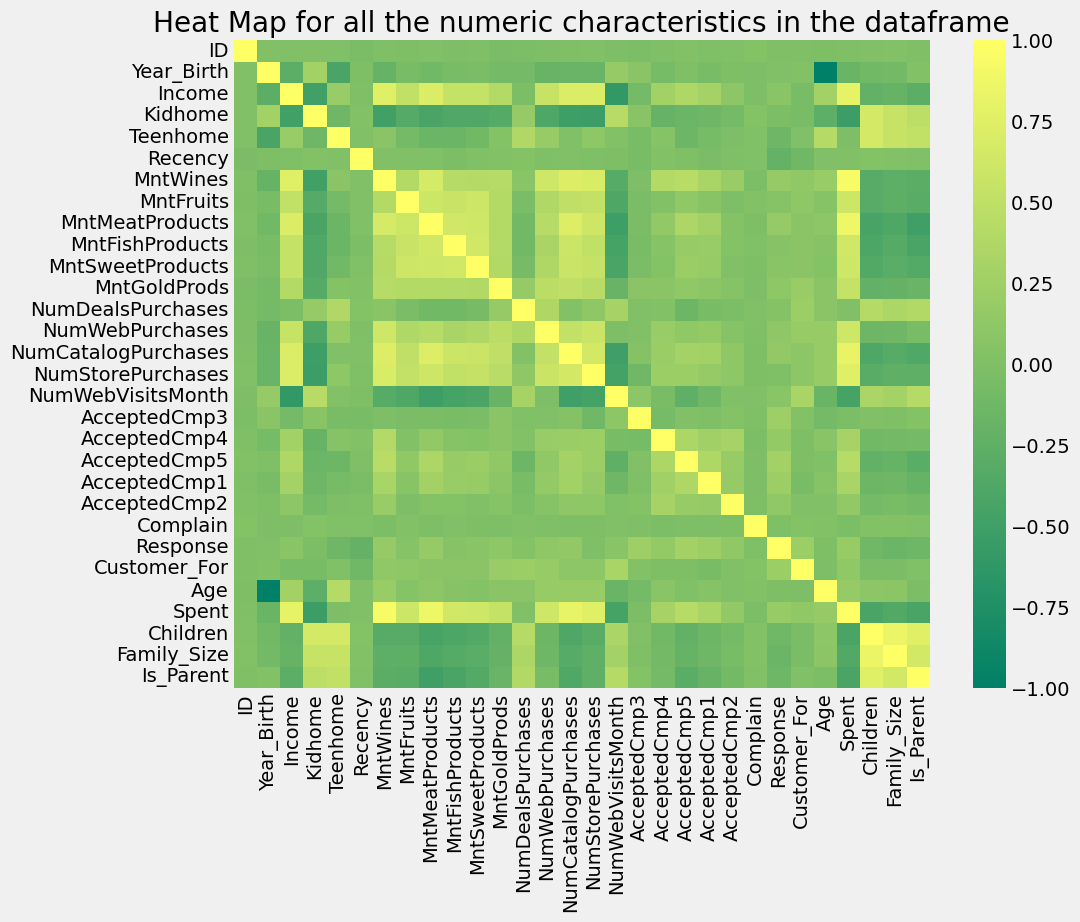

In [182]:
# Copy the dataframe
df_copy = df.copy()

# dropping all the non-numeric columns
df_copy = df_copy.drop(['Education', 'Marital_Status', 'Dt_Customer', 'Living_With', 'Age_Group', 'Z_CostContact', 'Z_Revenue'], axis=1)

# Create heatmap using seaborn, increasing the size of the heatmap so that all the characteristics appear in the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_copy.corr(), cmap='summer', ax=ax)

# Show the plot
plt.title("Heat Map for all the numeric characteristics in the dataframe")
plt.show()

Παρατηρούμε ότι το πεδίο Income έχει πολύ μεγαλύτερες τιμές από τα υπόλοιπα αριθμητικά χαρακτηριστικά

---
## Ζητούμενο 6 - 10 Ερωτήματα που θα απαντηθούν με γραφήματα

1. Σε ποιά κατηγορία Marital_Status ανήκει το μεγαλύτερο ποσοστό των πελατών της
εταιρείας;

Το ερώτημα θα απαντηθεί με την χρήση ενός pie chart.

          Marital_Status
Married              712
Together             484
Single               393
Divorced             189
Widow                 60


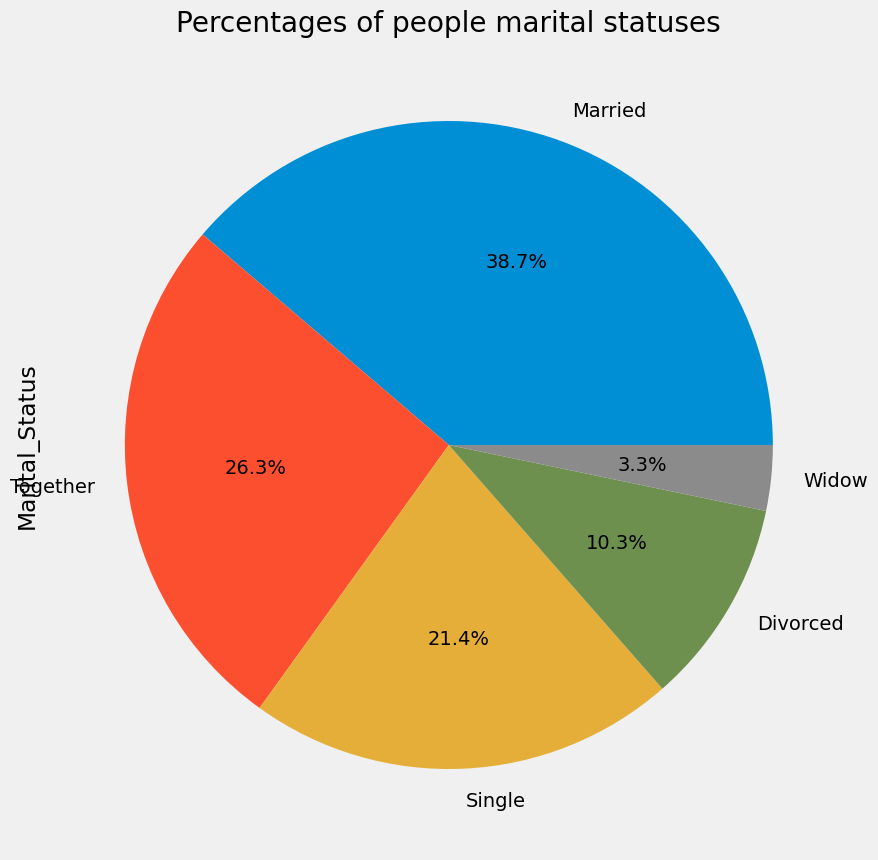

In [184]:
# Count the number of each fruit
status_count = df['Marital_Status'].value_counts()

# Add a title to the plot
plt.title('Percentages of people marital statuses')

# Printing the results
res = status_count.to_frame()
print(res)

# Plot the result as a pie chart
status_count.plot.pie(autopct='%1.1f%%', figsize=(10,10))

# Show the plot
plt.show()

Το μεγαλύτερο ποσοστό πελατών της εταιρείας είναι παντρεμένοι (38.7%) και το 26.3% είναι σε σχέση. Έπειτα το 21.4% είναι ελέυθεροι, το 10.3% διαζευγμένοι και το 3.3% χήροι.

2. Πόσοι πελάτες έχουν κάνει Complain ;

Το ερώτημα θα απαντηθεί με την χρήση ενός pie chart

     Complain
No       1819
Yes        19


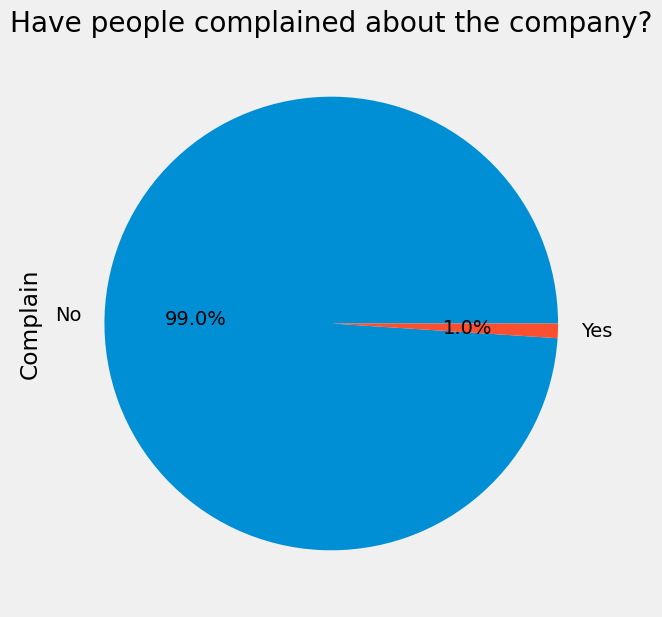

In [185]:
# Define a dictionary with the labels
labels = {0: 'No', 1: 'Yes'}

# Count the number of each fruit
status_count = df['Complain'].map(labels).value_counts()

# Add a title to the plot
plt.title('Have people complained about the company?')

# Printing the results
res = status_count.to_frame()
print(res)

# Plot the result as a pie chart
status_count.plot.pie(autopct='%1.1f%%', figsize=(7,7))

# Show the plot
plt.show()

3. Σχέση μεταξύ του αριθμού των αγορών Spent και της οικογενειακής κατάστασης.

Το ερώτημα αυτό θα απαντηθεί με κάθετα bars.

                     Spent
Marital_Status            
Divorced        466.518519
Married         437.574438
Single          458.750636
Together        472.898760
Widow           573.316667


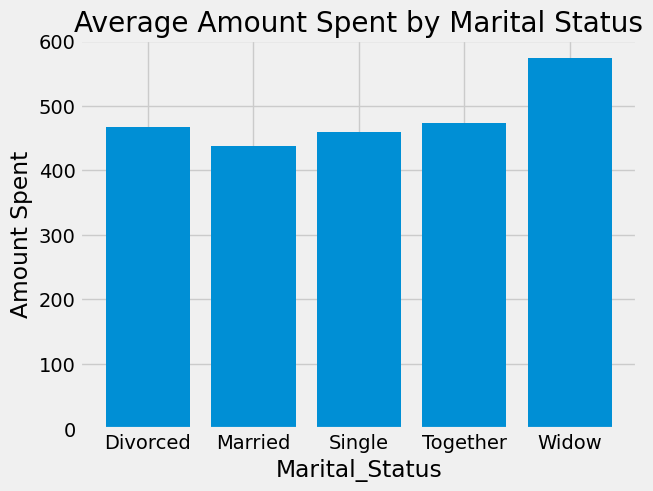

In [186]:
# Create a new dataframe with only columns Spent and Marital Status
new_df = df.loc[:, ['Marital_Status', 'Spent']].copy()

# Grouping the data by marital status
new_df = new_df.groupby('Marital_Status').mean()

print(new_df)

# plot the bar chart
status = new_df.index
amount = new_df['Spent']
plt.bar(status, amount)

# set the plot title and axis labels
plt.title('Average Amount Spent by Marital Status')
plt.xlabel('Marital_Status')
plt.ylabel('Amount Spent')

# show the plot
plt.show()

Παρατηρούμε ότι οι πελάτες άμα ομαδοποιηθούν σε οικογενειακή κατάσταση ξοδεύουν περίπου το ίδιο κατά μέσο όρο. Εξαίρεση αποτελούν οι χήροι ξοδεύουν κατά μέσο όρο περισσότερο από τους υπόλοιπους.

5. Τι σχέση έχει η ηλικία Age Group με το χαρακτηριστικό Spent των αγορών;

Το ερώτημα αυτό θα απαντηθεί με κάθετα bars.

                Spent
Age_Group            
21-30      691.000000
31-40      349.340426
41-50      372.573614
51-60      462.073077
61-70      569.100000
71-80      606.244444
>80        157.000000


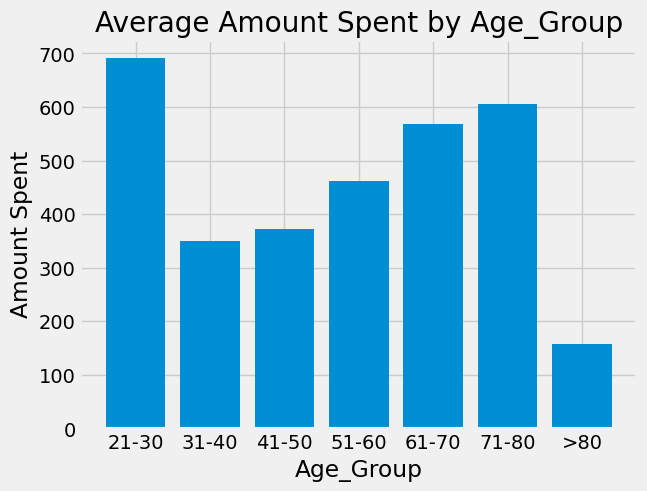

In [187]:
# # Create a new dataframe with only columns Spent and Age Group
new_df = df.loc[:, ['Age_Group', 'Spent']].copy()

# Grouping the data by marital status
new_df = new_df.groupby('Age_Group').mean()

print(new_df)

# plot the bar chart
status = new_df.index
amount = new_df['Spent']
plt.bar(status, amount)

# set the plot title and axis labels
plt.title('Average Amount Spent by Age_Group')
plt.xlabel('Age_Group')
plt.ylabel('Amount Spent')

# show the plot
plt.show()

Παρατηρούμε ότι κατά μέσο όρο οι μεγαλύτερες σε ηλικία ηλικιακές ομάδες ξοδεύουν περισσότερο από τις μικρότερες σε ηλικία. Εξαιρέσεις αποτελούν οι ομάδες 21-30 που ξοδεύουν περισσότερο απ'όλους και οι >80 που ξοδεύουν λιγότερο από όλους.

7. Ποια είναι η σχέση μεταξύ της εκπαίδευσης και του εισοδήματος;

Το ερώτημα αυτό θα απαντηθεί με κάθετα bars.

                  Income
Education               
2n Cycle    42281.130435
Basic       20039.490566
Graduation  47094.603795
Master      49969.650943
PhD         52719.824390


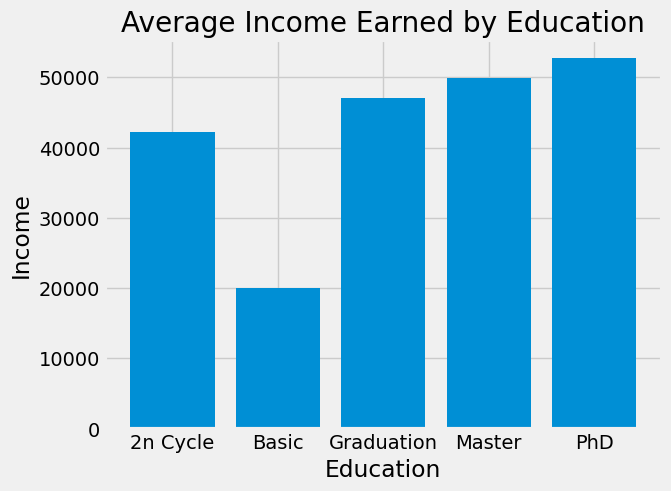

In [188]:
# # Create a new dataframe with only columns Education and Income
new_df = df.loc[:, ['Education', 'Income']].copy()

# Grouping the data by marital status
new_df = new_df.groupby('Education').mean()

print(new_df)

# plot the bar chart
status = new_df.index
amount = new_df['Income']
plt.bar(status, amount)

# set the plot title and axis labels
plt.title('Average Income Earned by Education')
plt.xlabel('Education')
plt.ylabel('Income')

# show the plot
plt.show()

Παρατηρούμε ότι όσο πιο εκπαιδευμένος είναι ένας πελάτης τόσο πιο μεγάλο εισόδημα βγάζει κατά μέσο όρο.

8. Ποια είναι η σχέση μεταξύ του εισοδήματος και του μεγέθους της οικογένειας;

Το ερώτημα αυτό θα απαντηθεί με κάθετα bars.

                   Income
Family_Size              
1            59053.241611
2            49730.680412
3            45441.217122
4            43650.372694
5            45817.866667


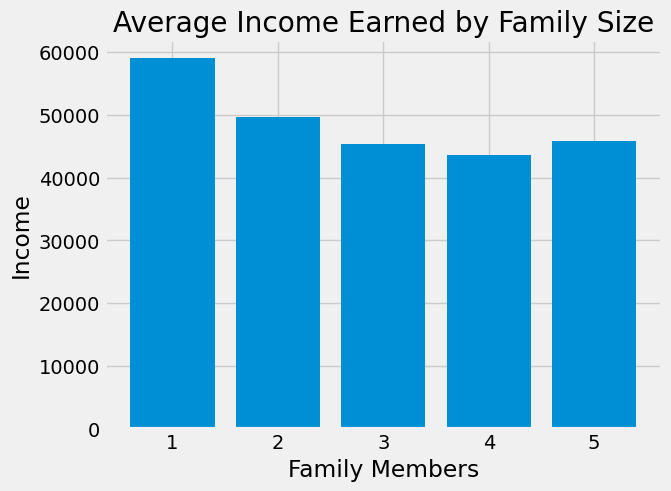

In [189]:
# Create a new dataframe with only columns Family Size and Income
new_df = df.loc[:, ['Family_Size', 'Income']].copy()

# Grouping the data by marital status
new_df = new_df.groupby('Family_Size').mean()

print(new_df)

# plot the bar chart
status = new_df.index
amount = new_df['Income']
plt.bar(status, amount)

# set the plot title and axis labels
plt.title('Average Income Earned by Family Size')
plt.xlabel('Family Members')
plt.ylabel('Income')

# Set the tick locations and labels of the x-axis to integers only
plt.xticks(range(min(df['Family_Size']), max(df['Family_Size'])+1, 1))

# show the plot
plt.show()

Παρατηρούμε ότι όσο πιο μεγάλη οικογένεια έχει ένας πελάτης τόσο πιο μικρό εισόδημα βγάζει κατά μέσο όρο. Οι οικογένειες με 5 άτομα όμως βγάζουν περισσότερα από αυτές με 3 και με 4 άτομα.

14. Σχεδιάστε το ιστόγραμμα για τη στήλη NumDealsPurchases.

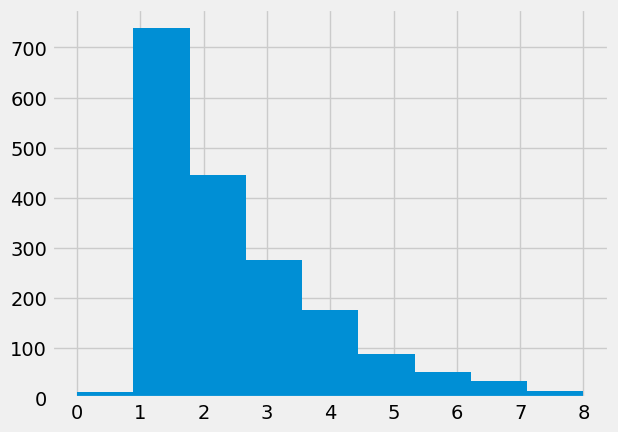

In [190]:
# plot the histogram
plt.hist(df['NumDealsPurchases'], bins=len(df['NumDealsPurchases'].unique()))

# Set the tick locations and labels of the x-axis to integers only
plt.xticks(range(min(df['NumDealsPurchases']), max(df['NumDealsPurchases'])+1, 1))

# show the plot
plt.show()

15. Σχεδιάστε το ιστόγραμμα για τη στήλη Income.

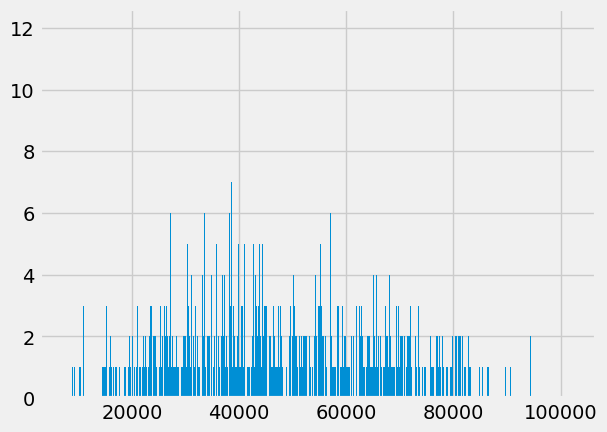

In [191]:
# plot the histogram
plt.hist(df['Income'], bins=len(df['Income'].unique()))

# show the plot
plt.show()

17. Σχεδιάστε το ιστόγραμμα για τη στήλη Family_Size.

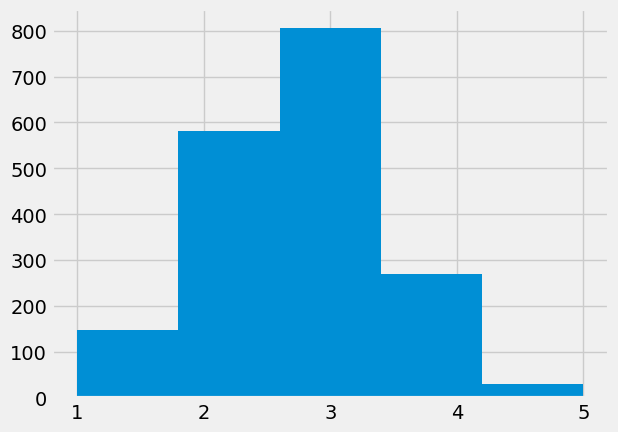

In [192]:
# plot the histogram
plt.hist(df['Family_Size'], bins=len(df['Family_Size'].unique()))

# Set the tick locations and labels of the x-axis to integers only
plt.xticks(range(min(df['Family_Size']), max(df['Family_Size'])+1, 1))

# show the plot
plt.show()

18.Οι πελάτες με μεταπτυχιακό τίτλο σπουδών ξοδεύουν περισσότερα χρήματα για
κρασί;

Αυτό το ερώτημα θα απαντηθεί ομαδοποιώντας όλες τις μοναδικές τιμές της στήλης Education με την στήλη MntWines κατά μέσο όρο και καταγράφοντας τα αποτελέσματα σε pie chart.

              MntWines
Education             
2n Cycle    144.962733
Basic         3.075472
Graduation  226.671875
Master      284.034591
PhD         360.273171


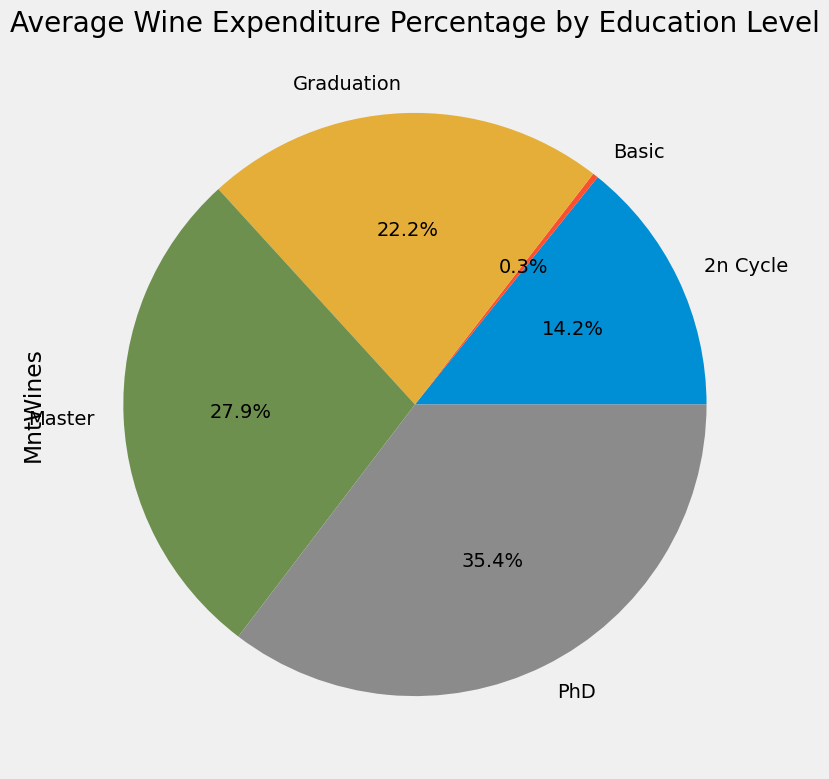

In [195]:
# Create a new dataframe with only columns Education and MntWines
new_df = df.loc[:, ['Education', 'MntWines']].copy()

# Grouping the data by Education and calculating the mean of MntWines for each Education level
new_df = new_df.groupby('Education').mean()

print(new_df)

# Add a title to the plot
plt.title('Average Wine Expenditure Percentage by Education Level')

# Plot the result as a pie chart
new_df['MntWines'].plot.pie(autopct='%1.1f%%', figsize=(9,9))

# Show the plot
plt.show()


Παρατηρούμε ότι οι πελάτες με μεταπτυχιακό ξοδεύουν (27.9% των συνολικών χρημάτων που ξοδέυτηκαν) περισσότερο από όλους σε κρασί με εξαίρεση αυτούς που έχουν διδακτορικό (35.4%) 

---
## Ζητούμενο 7 - Principal component analysis (PCA)
Σε αυτό το πρόβλημα, υπάρχουν πολλοί
παράγοντες βάσει των οποίων γίνεται μία ταξινόμηση. Αυτοί οι παράγοντες είναι βασικά
χαρακτηριστικά ή γνωρίσματα. Όσο μεγαλύτερος είναι ο αριθμός των χαρακτηριστικών, τόσο πιο
δύσκολη είναι η εργασία. Πολλά από αυτά τα χαρακτηριστικά είναι συσχετισμένα και, ως εκ
τούτου, περιττά. Αυτός είναι ο λόγος για τον οποίο θα πραγματοποιήσετε μείωση της
διάστασης στα επιλεγμένα χαρακτηριστικά. Η μείωση της διάστασης είναι η διαδικασία μείωσης
του αριθμού των υπό εξέταση τυχαίων μεταβλητών, και έχει ώς αποτέλεσμα την απόκτηση ενός
συνόλου κύριων μεταβλητών.

Οι μεταβλητές στο σύνολο δεδομένων που αφορούν κατηγορίες και όχι αριθμητικές τιμές, μετά
και τις προσθήκες χαρακτηριστικών που έγιναν στα προηγούμενα ερωτήματα είναι οι παρακάτω
['Education','Marital_Status','Living_With']. Για αυτές τις μεταβλητές θα χρησιμοποιήσετε τον
LabelEncoder() ώστε να μετατραπούν σε αριθμητικά δεδομένα (η διαδικασία ονομάζεται one
hot encoding).

Για αρχή ας θυμηθούμε τις μοναδικές τιμές των κατηγορικών χαρακτηριστικών

In [196]:
# Printing all the unique values for the non-numerical columns
print(df['Education'].unique())
print(df['Marital_Status'].unique())
print(df['Living_With'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow']
['Alone' 'Partner']


Τώρα θα τα μετατρέψουμε σε αριθμητικά.

In [197]:
# Creating a Label Encoder
le = LabelEncoder()

# Converting object type data to numerical data
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Living_With'] = le.fit_transform(df['Living_With'])

# Printing out the results
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
1,2174,1954,2,2,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3281,69,27,2,3,1,0,61-70
2,4141,1965,2,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,3492,58,776,0,2,0,1,51-60
3,6182,1984,2,3,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,3319,39,53,1,3,1,1,31-40
4,5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,3273,42,422,1,3,1,1,41-50
5,7446,1967,3,3,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,3483,56,716,1,3,1,1,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,2,1,34421.0,1,0,2013-07-01,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0,3488,49,30,1,3,1,1,41-50
2236,4001,1946,4,3,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,3169,77,444,3,5,1,1,71-80
2237,7270,1981,2,0,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,3270,42,1241,0,1,0,0,41-50
2238,8235,1956,3,3,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,3354,67,843,1,3,1,1,61-70


Θα εκτυπώσουμε τώρα τις μοναδικές τιμές των πλέον αριθμητικών χαρακτηριστικών ώστε να γνωρίζουμε ποιο νούμερο αντιστοιχεί σε κάθε τιμή

In [198]:
# Printing all the unique values for the now numerical columns
print(df['Education'].unique())
print(df['Marital_Status'].unique())
print(df['Living_With'].unique())

[2 4 3 1 0]
[2 3 1 0 4]
[0 1]



Στη συνέχεια δημιουργήστε ένα αντίγραφο του dataframe το οποίο θα περιέχει όλες τις
αριθμητικές στήλες και διαγράψτε τις στήλες που σχετίζονται με προσφορές και προωθητικές
ενέργειες, δηλαδή τις ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Response'].


In [199]:
# dropping all the columns referring to promoting
df_copy = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], axis=1)
df_copy

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
1,2174,1954,2,2,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,3,11,3281,69,27,2,3,1,0,61-70
2,4141,1965,2,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,3,11,3492,58,776,0,2,0,1,51-60
3,6182,1984,2,3,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,3,11,3319,39,53,1,3,1,1,31-40
4,5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,3,11,3273,42,422,1,3,1,1,41-50
5,7446,1967,3,3,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,3,11,3483,56,716,1,3,1,1,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,2,1,34421.0,1,0,2013-07-01,81,3,3,7,6,2,9,1,1,0,2,7,3,11,3488,49,30,1,3,1,1,41-50
2236,4001,1946,4,3,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,3,11,3169,77,444,3,5,1,1,71-80
2237,7270,1981,2,0,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,3,11,3270,42,1241,0,1,0,0,41-50
2238,8235,1956,3,3,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,3,11,3354,67,843,1,3,1,1,61-70


Έτσι, τα δεδομένα που έχουν προκύψει περιέχουν χαρακτηριστικά διαφόρων διαστάσεων και
διακυμάνσεων. Οι διαφορετικές διακυμάνσεις των χαρακτηριστικών των δεδομένων επηρεάζουν
αρνητικά τη μοντελοποίηση ενός συνόλου δεδομένων. Η λύση είναι να γίνει αυτό που
ονομάζεται Standardization έτσι ώστε κάθε στήλη/χαρακτηριστικό/μεταβλητή να έχει μ = 0 και σ
= 1.

In [200]:
# A List of all the columns that do not need to be standardized
not_to_be_standardized = ["ID", "Dt_Customer", "Age_Group", "Z_CostContact", "Z_Revenue"]

# Standardizing the dataframe columns
for column in df_copy.columns:

    # Bypasssing the Date and Age Group columns
    if column in not_to_be_standardized:
        continue

    # The rest columns are standardized, z = (X - μ)/σ
    df_copy[column] = (df_copy[column] - df_copy[column].mean()) / df_copy[column].std()

# Print the dataframe results
df_standard = df_copy.copy()
df_standard = df_standard.drop(not_to_be_standardized, axis=1)
df_standard

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With
1,-1.313131,-0.367949,0.249485,-0.068881,0.896766,0.843163,-0.379001,-0.777073,-0.606621,-0.680499,-0.610441,-0.623297,-0.722695,-0.206177,-1.082391,-0.448071,-1.094911,-0.292845,-1.104793,1.313131,-0.858437,1.317235,0.341539,0.515457,-1.36452
2,-0.354515,-0.367949,1.193009,1.268928,-0.928545,-0.997376,-0.795361,0.556647,1.147222,0.090932,2.258561,0.140475,0.235051,-0.838819,1.624848,0.003192,1.440455,-0.762520,-0.055177,0.354515,0.630567,-1.457640,-0.801902,-1.938972,0.73246
3,1.301278,-0.367949,1.193009,-1.111746,0.896766,-0.997376,-0.795361,-0.777073,-0.497006,-0.591243,-0.399872,-0.546920,-0.749299,-0.206177,-0.695642,-0.899334,-0.461070,0.176831,-0.915763,-1.301278,-0.806750,-0.070202,0.341539,0.515457,0.73246
4,1.039837,1.404763,-0.694040,0.563731,0.896766,-0.997376,1.564011,-0.256440,0.927992,0.033553,0.547688,0.369607,-0.483259,1.691751,0.464603,0.454454,0.172772,-0.292845,-1.144589,-1.039837,-0.073181,-0.070202,0.341539,0.515457,0.73246
5,-0.180221,0.518407,1.193009,0.787149,-0.928545,0.843163,-1.142328,0.858743,0.891453,-0.093957,-0.663083,0.942435,-0.509863,-0.206177,0.851352,0.905717,1.440455,0.176831,-0.099947,0.180221,0.511288,-0.070202,0.341539,0.515457,0.73246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,0.429808,-0.367949,-0.694040,-0.700117,0.896766,-0.997376,1.112954,-0.802783,-0.533544,-0.674124,-0.505156,-0.585108,-0.642883,-0.838819,-1.082391,-0.899334,-1.094911,0.646507,-0.075075,-0.429808,-0.852473,-0.070202,0.341539,0.515457,0.73246
2236,-2.010307,1.404763,1.193009,0.866616,2.722076,0.843163,0.245538,0.492372,-0.643159,-0.527488,-0.663083,-0.661485,-0.669487,2.957035,1.624848,0.003192,-0.144149,0.646507,-1.661936,2.010307,-0.029446,2.704673,2.628422,0.515457,0.73246
2237,1.039837,-0.367949,-1.637564,0.494270,-0.928545,-0.997376,1.459921,2.105692,1.110684,0.664724,0.179193,-0.203222,-0.243822,-0.838819,-0.695642,0.454454,2.391217,0.176831,-1.159513,-1.039837,1.554982,-1.457640,-1.945343,-1.938972,-1.36452
2238,-1.138838,0.518407,1.193009,1.143559,-0.928545,0.843163,-1.419901,0.563075,0.452993,0.645597,1.442606,0.484172,0.740528,-0.206177,0.851352,1.356980,1.440455,-1.232196,-0.741656,1.138838,0.763762,-0.070202,0.341539,0.515457,0.73246



Τέλος χρησιμοποιήστε την μέθοδο συμπίεσης Principal Component Analysis (PCA) για να
μειώσετε τις διαστάσεις σε n_components=3. Σχεδιάστε την (τρισδιάστατη) προβολή του
αποτελέσματος.

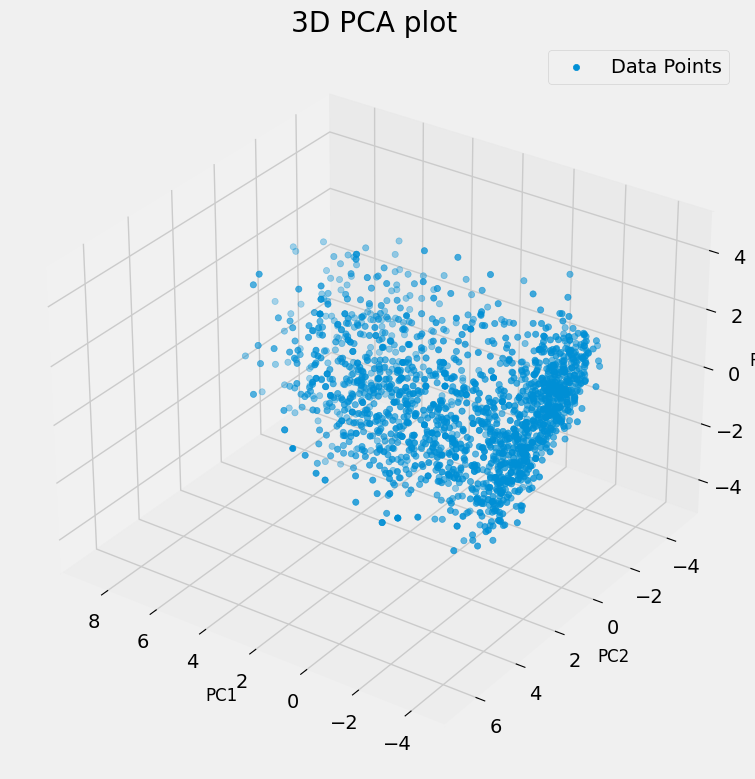

In [201]:
# Compressing the dataframe to PCA format in 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_standard)

# Creating a 3d plot for the PCA result
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111,projection='3d')

# We will deploy a graph of points, not continuous lines
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], label='Data Points')

# We create label names for the 3 axes
ax.set_xlabel("PC1", fontsize=12)
ax.set_ylabel("PC2", fontsize=12)
ax.set_zlabel("PC3", fontsize=12)

# Display the plot
ax.view_init(30, 125)
ax.legend()
plt.title("3D PCA plot")
plt.show()

---
## Ζητούμενο 8 - Υλοποίηση Συσταδοποίησης (Clustering)

Για το Clustering θα χρησιμοποιήσουμε τα δεδομένα που προέκυψαν από το προηγούμνο ζητούμενο. 

Βήματα
- Μέθοδος ELBOW για τον προσδιορισμό του αριθμού των συστάδων που πρέπει να
σχηματιστούν

Χρησιμοποιήθηκε η βασική μέθοδος ELBOW από τις διαφάνειες του φροντηστηρίου.

In [202]:
# Calculate the score for different K-mean values
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(pca_result)
  sse.append(kmeans.inertia_)

Ας παραστήσουμε γραφικά τα αποτελέσματα τις μεθόδου

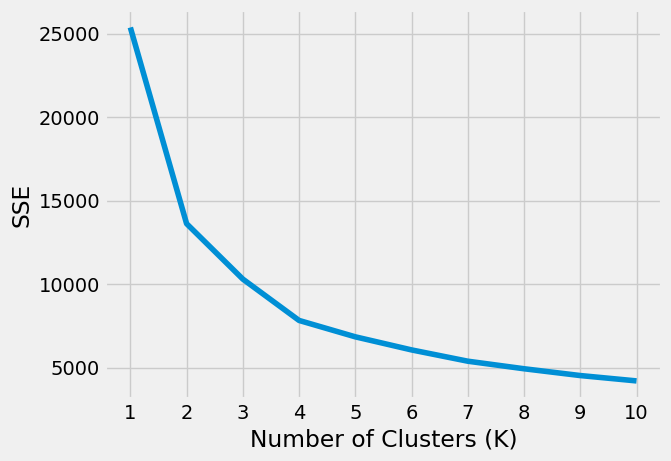

In [203]:
# Plot the data
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.show()

Σύμφωνα με την γραφική παράσταση, βλέπουμε ότι στο K=4, καταγράφεται το σχήμα του αγκώνα και έτσι συμπεραίνουμε ότι το ιδανικός αριθμός συστάδων που πρέπει να υλοποιηθούν είναι 4.

- Συσταδοποίηση μέσω συσσωρευτικής συσταδοποίησης (Agglomerative και K-Means)
 - Agglomerative

In [204]:
# Perform Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(pca_result)

- - Εμφάνιση των σχηματιζόμενων συστάδων μέσω διαγράμματος (πχ scatter plot).

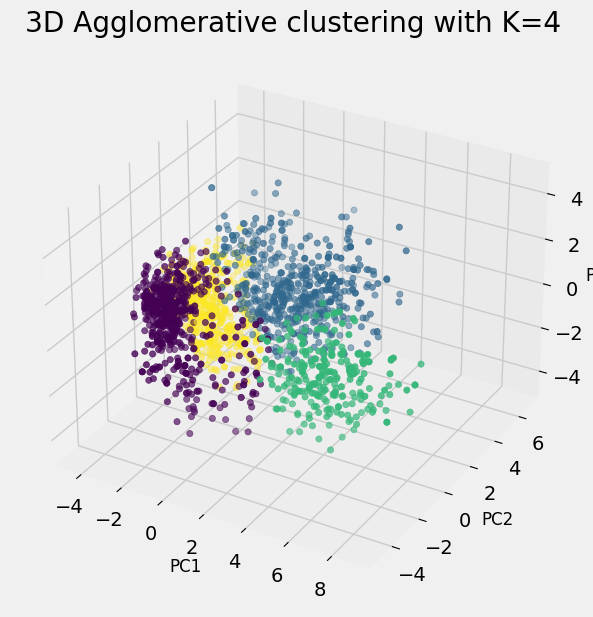

In [205]:
# Create the plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=agg_labels, cmap='viridis')

# Create the labels
ax.set_xlabel("PC1", fontsize=12)
ax.set_ylabel("PC2", fontsize=12)
ax.set_zlabel("PC3", fontsize=12)
plt.title("3D Agglomerative clustering with K=4")

# Show the plot
plt.show()

- - K-means

In [206]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(pca_result)
labels = kmeans.labels_

- - Εμφάνιση των σχηματιζόμενων συστάδων μέσω διαγράμματος (πχ scatter plot).

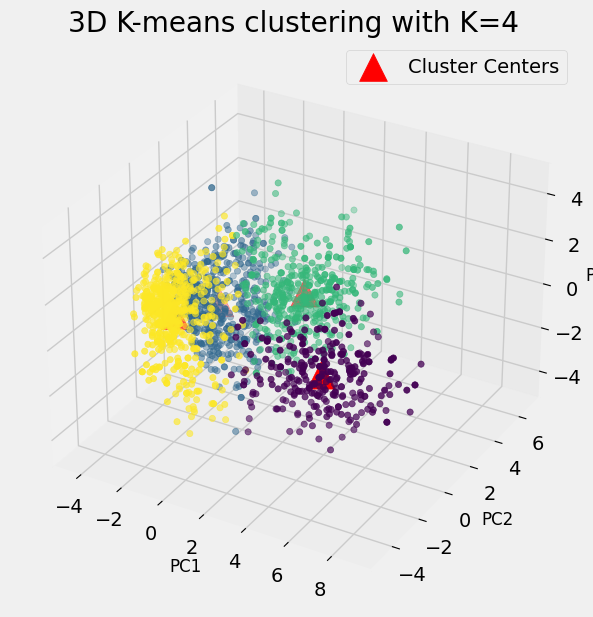

In [210]:
# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# Create the plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111,projection='3d')

# Plot the cluster centers
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], label='Cluster Centers', c='red', marker='^', s=400)

# Plot the data points
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=labels, cmap='viridis')

# Create the labels
ax.set_xlabel("PC1", fontsize=12)
ax.set_ylabel("PC2", fontsize=12)
ax.set_zlabel("PC3", fontsize=12)
ax.legend()

# Show the plot
plt.title("3D K-means clustering with K=4")
plt.show()

Παρατηρούμε ότι οι 2 μέθοδοι δεν φτιάχνουν ακριβώς τα ίδια clusters με K=4.

> Γιώργος Σάββας-Δημητρίου, 1115201800045 - Ραφαήλ-Χρήστος Τασιούλας 1115201800191